In [533]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [534]:
train = pd.read_csv(r"F:\Data Analyst materials\Project\Laptop price detection\laptops_train.csv")

In [535]:
test = pd.read_csv(r"F:\Data Analyst materials\Project\Laptop price detection\laptops_test.csv")

In [536]:
df = pd.concat([train,test],ignore_index = True)

In [537]:
backup = pd.concat([train,test],ignore_index = True)

In [538]:
backup = df.copy

In [539]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


### Data cleaning 

In [540]:
# Model name 

df['Model Name'] = df['Model Name'].str.split('(').str[0]


In [541]:
## Screen cleaning

import re 

df['Screen type'] = 'missing'
df['Resolution'] = 'doop'
df['Touchscreen'] = 'clear'

for i in range(0,len(df['Screen'])):
    df['Screen type'][i] = re.findall(r'(\D+)',df['Screen'][i])[0]
    df['Resolution'][i]  = re.findall(r'(\d+x\d+)',df['Screen'][i])[0]
    if 'Touchscreen' in df['Screen'][i]:
        df['Touchscreen'][i] = 1
    else:
        df['Touchscreen'][i] = 0

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2203278488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen type'][i] = re.findall(r'(\D+)',df['Screen'][i])[0]
C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2203278488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resolution'][i]  = re.findall(r'(\d+x\d+)',df['Screen'][i])[0]
C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2203278488.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [542]:
## Screen type cleaning

for i in range (0,len(df['Screen type'])):
    if 'IPS Panel' in df['Screen type'][i] and df['Screen type'][i] != 'IPS Panel Retina Display ':
        df['Screen type'][i] = df['Screen type'][i].replace(df['Screen type'][i],'IPS Panel')
    if df['Screen type'][i] != 'IPS Panel Retina Display ' and df['Screen type'][i] != 'IPS Panel':
        df['Screen type'][i] = np.nan

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\821934588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen type'][i] = np.nan
C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\821934588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen type'][i] = df['Screen type'][i].replace(df['Screen type'][i],'IPS Panel')


In [543]:
df['Screen type'].value_counts()

IPS Panel                    348
IPS Panel Retina Display      17
Name: Screen type, dtype: int64

In [544]:
## Can drop Screen from df 

df.drop('Screen',axis = 1, inplace = True)

In [545]:
## CPU 
df['CPU Name'] = 'NIL'
for i in range(0,len(df['CPU'])):
    df['CPU Name'][i] = " ".join(df['CPU'][i].split(" ")[0:3])

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\4166621086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPU Name'][i] = " ".join(df['CPU'][i].split(" ")[0:3])


In [546]:
## CPU name

for i in range(0,len(df['CPU Name'])):
    if 'AMD' in df['CPU Name'][i]:
        df['CPU Name'][i] = df['CPU Name'][i].replace(df['CPU Name'][i],'AMD Proccesor')

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\393504193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPU Name'][i] = df['CPU Name'][i].replace(df['CPU Name'][i],'AMD Proccesor')


In [547]:
df['CPU Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Proccesor', 'Intel Core i3',
       'Intel Core M', 'Intel Atom x5-Z8350', 'Intel Atom x5-Z8300',
       'Intel Celeron Dual', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'Intel Xeon E3-1505M', 'Intel Celeron Quad', 'Intel Xeon E3-1535M',
       'Intel Atom Z8350', 'Intel Pentium Dual', 'Intel Atom X5-Z8350',
       'Samsung Cortex A72&A53'], dtype=object)

In [548]:
for i in range(0,len(df['CPU Name'])):
    if 'Intel ' in df['CPU Name'][i]:
        if 'Core ' not in df['CPU Name'][i]:
            df['CPU Name'][i] = df['CPU Name'][i].replace(df['CPU Name'][i],'Intel other processor')

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2777237466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPU Name'][i] = df['CPU Name'][i].replace(df['CPU Name'][i],'Intel other processor')


In [549]:
df.drop('CPU',axis = 1, inplace = True)

In [550]:
## Storage

df['Storage GB'] = 0

for i in range (0,len(df[' Storage'])):
    df['Storage GB'][i] = (df[' Storage'][i].split(" ")[0])
    if 'TB' in df['Storage GB'][i]:
        df['Storage GB'][i] = df['Storage GB'][i].replace(df['Storage GB'][i],str((int(df['Storage GB'][i][0]))*1000) +'GB')

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\195121801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage GB'][i] = (df[' Storage'][i].split(" ")[0])


In [551]:
df['Storage Type'] = 'fg'

for i in range(0,len(df[' Storage'])):
    df['Storage Type'][i] = df[' Storage'][i].split(" ")[1]
    

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2574269252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Storage Type'][i] = df[' Storage'][i].split(" ")[1]


In [552]:
df.drop(' Storage',axis = 1, inplace = True)

In [553]:
## GPU

df['GPU Brand'] = df['GPU'].str.split(" ").str[0]

In [554]:
df['GPU Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1297    Intel
1298    Intel
1299    Intel
1300      AMD
1301    Intel
Name: GPU Brand, Length: 1302, dtype: object

In [555]:
df.drop('GPU',axis = 1,inplace = True)

In [556]:
## Operating system 

index = df[df['Operating System'] == 'macOS'].index
index

Int64Index([0, 1, 3, 4, 7, 12, 14, 15, 17, 45, 81, 249, 270], dtype='int64')

In [557]:
for i in index:
    df['Operating System'][i] = 'Mac OS'


C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_7628\2461950547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Operating System'][i] = 'Mac OS'


In [558]:
## Weight

df['Weight'] = df['Weight'].str.split('k').str[0]

### Cleaned data

In [559]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,Screen type,Resolution,Touchscreen,CPU Name,Storage GB,Storage Type,GPU Brand
0,Apple,MacBook Pro,Ultrabook,"13.3""",8GB,Mac OS,NaN,1.37,11912523.48,IPS Panel Retina Display,2560x1600,0,Intel Core i5,128GB,SSD,Intel
1,Apple,Macbook Air,Ultrabook,"13.3""",8GB,Mac OS,NaN,1.34,7993374.48,NaN,1440x900,0,Intel Core i5,128GB,Flash,Intel
2,HP,250 G6,Notebook,"15.6""",8GB,No OS,NaN,1.86,5112900.00,NaN,1920x1080,0,Intel Core i5,256GB,SSD,Intel
3,Apple,MacBook Pro,Ultrabook,"15.4""",16GB,Mac OS,NaN,1.83,22563005.40,IPS Panel Retina Display,2880x1800,0,Intel Core i7,512GB,SSD,AMD
4,Apple,MacBook Pro,Ultrabook,"13.3""",8GB,Mac OS,NaN,1.37,16037611.20,IPS Panel Retina Display,2560x1600,0,Intel Core i5,256GB,SSD,Intel


### EDA

In [560]:
len(df)

1302

In [561]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
RAM                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
Screen type                 937
Resolution                    0
Touchscreen                   0
CPU Name                      0
Storage GB                    0
Storage Type                  0
GPU Brand                     0
dtype: int64

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   RAM                       1302 non-null   object 
 5   Operating System          1302 non-null   object 
 6   Operating System Version  1132 non-null   object 
 7   Weight                    1302 non-null   object 
 8   Price                     1302 non-null   float64
 9   Screen type               365 non-null    object 
 10  Resolution                1302 non-null   object 
 11  Touchscreen               1302 non-null   object 
 12  CPU Name                  1302 non-null   object 
 13  Storage GB                1302 non-null   object 
 14  Storage 

In [563]:
r = max(df[df['Manufacturer'] == 'Razer']['Price'])
lg = max(df[df['Manufacturer'] == 'LG']['Price'])
print(r,lg)

54232308.0 20442708.0


In [564]:
lg+lg*(62.33/100)

33184647.896399997

In [565]:
r - lg

33789600.0

<Axes: xlabel='Manufacturer', ylabel='Price'>

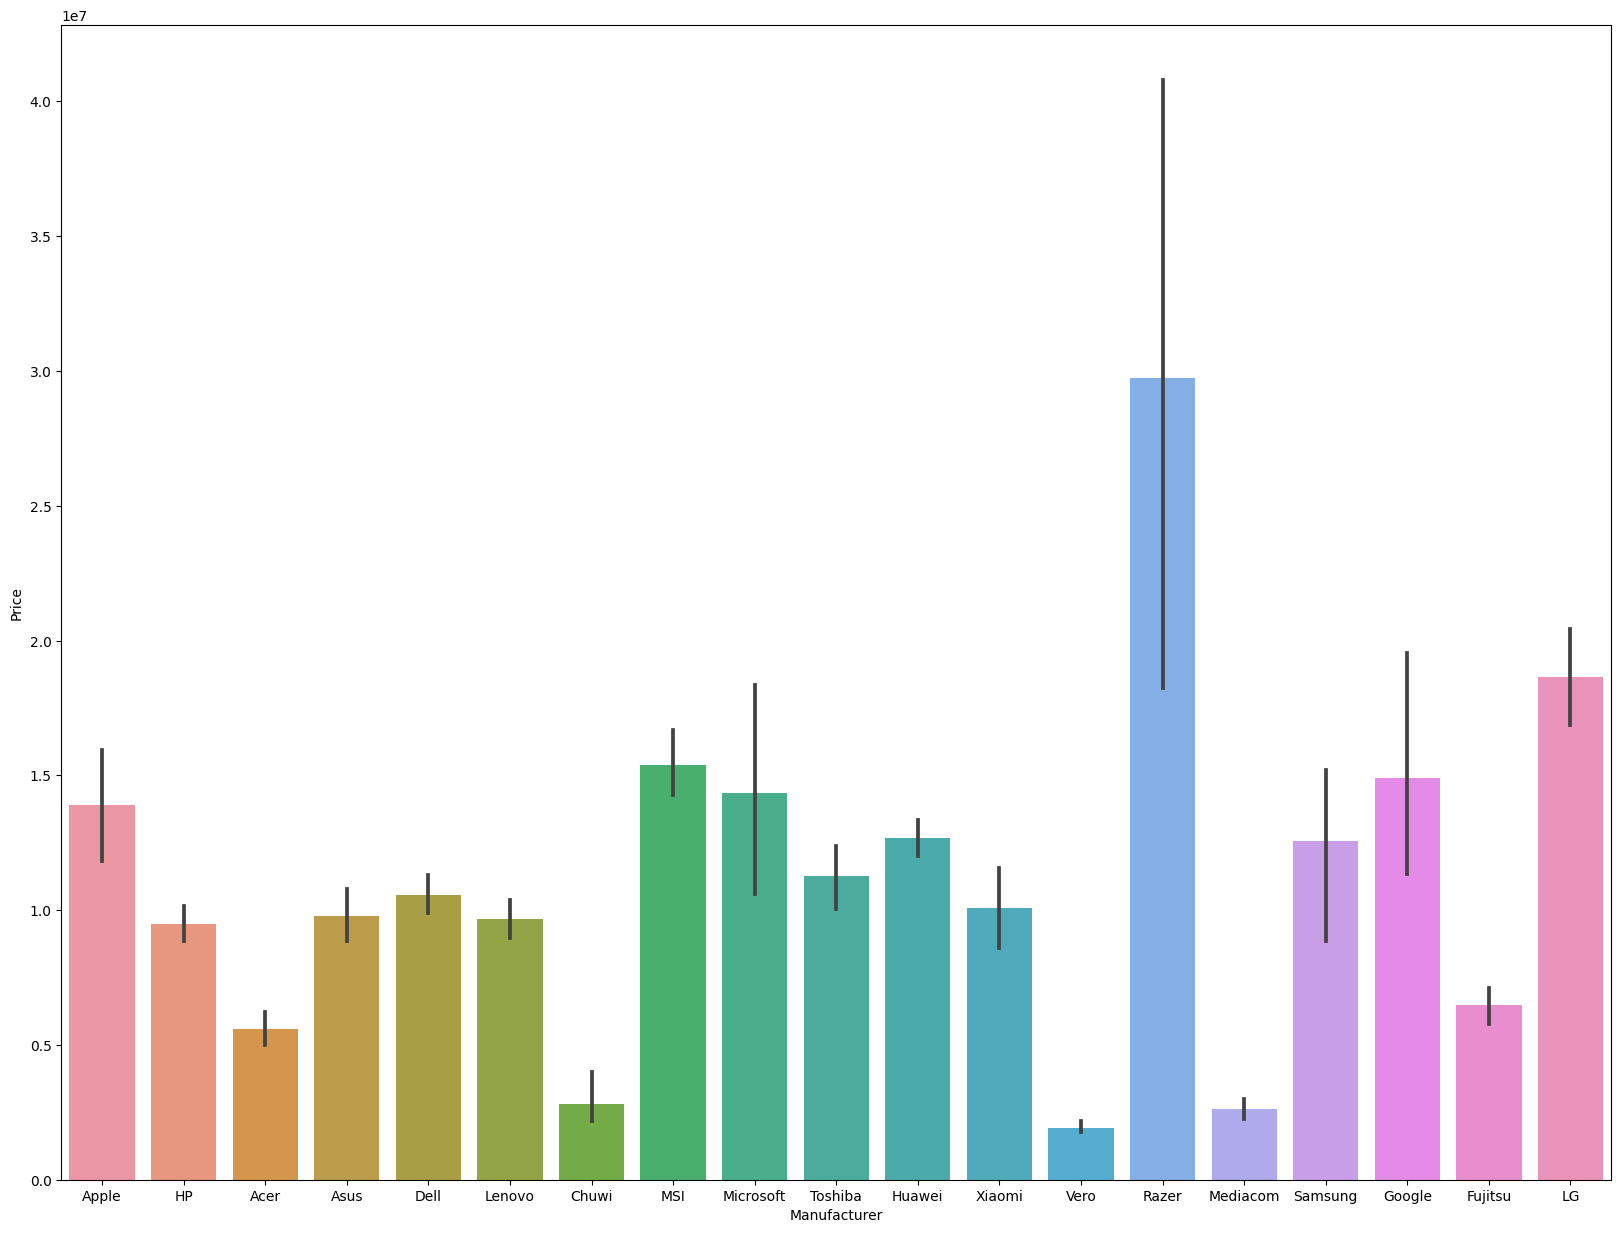

In [566]:
plt.figure(figsize=(20,15))
sns.barplot(x=df['Manufacturer'],y=df['Price'])

<Axes: xlabel='Category', ylabel='Price'>

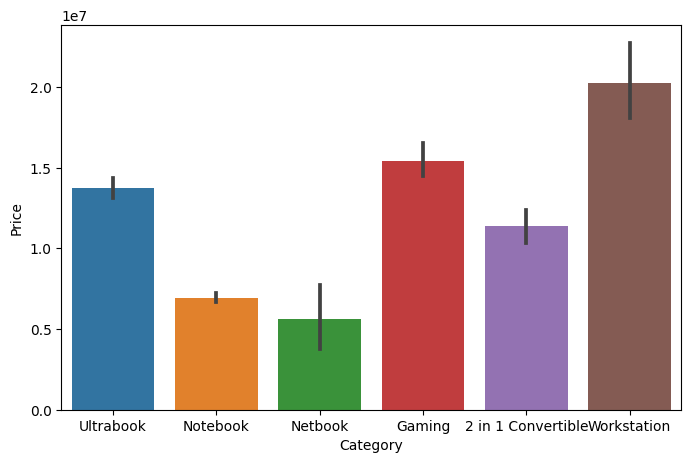

In [567]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Category'],y=df['Price'])

In [568]:
for i in df['Category'].unique():
    print(i)
    print((df[df['Category'] == i]['Manufacturer']).value_counts())
    print('-----'*10)

Ultrabook
Dell         49
HP           36
Lenovo       31
Apple        21
Asus         20
Toshiba      12
Microsoft     6
Samsung       5
Acer          4
Google        3
LG            3
Huawei        2
Xiaomi        2
Razer         2
Name: Manufacturer, dtype: int64
--------------------------------------------------
Notebook
HP          184
Lenovo      178
Dell        165
Acer         78
Asus         67
Toshiba      36
Mediacom      6
Vero          4
Chuwi         3
Fujitsu       3
Xiaomi        2
Samsung       1
Name: Manufacturer, dtype: int64
--------------------------------------------------
Netbook
HP         9
Acer       5
Asus       4
Lenovo     4
Dell       2
Samsung    1
Name: Manufacturer, dtype: int64
--------------------------------------------------
Gaming
Asus      54
MSI       54
Dell      40
Lenovo    32
HP        12
Acer       8
Razer      5
Name: Manufacturer, dtype: int64
--------------------------------------------------
2 in 1 Convertible
Lenovo      48
Dell       

<Axes: >

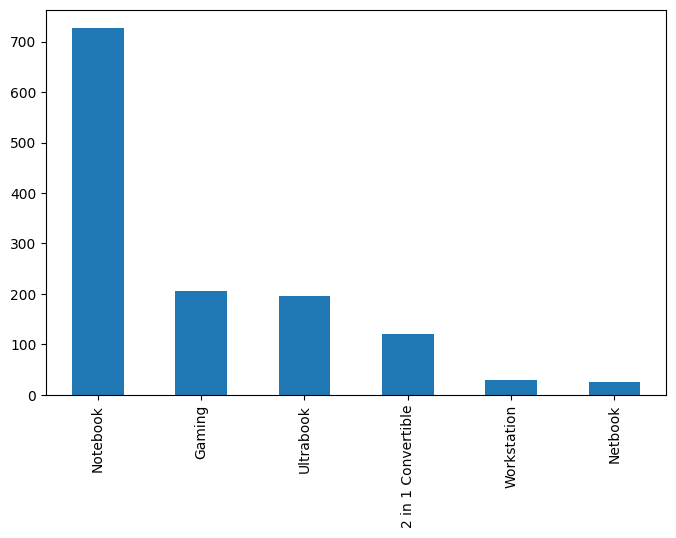

In [569]:
plt.figure(figsize=(8,5))
df['Category'].value_counts().plot.bar()

<Axes: >

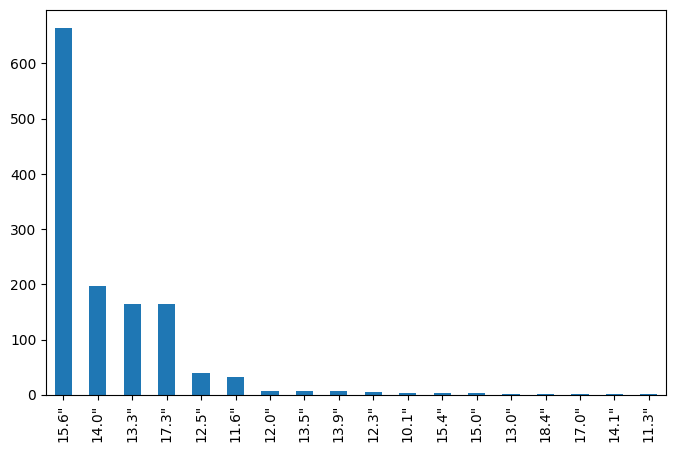

In [570]:
plt.figure(figsize=(8,5))
df['Screen Size'].value_counts().plot.bar()

<Axes: xlabel='Screen Size', ylabel='Price'>

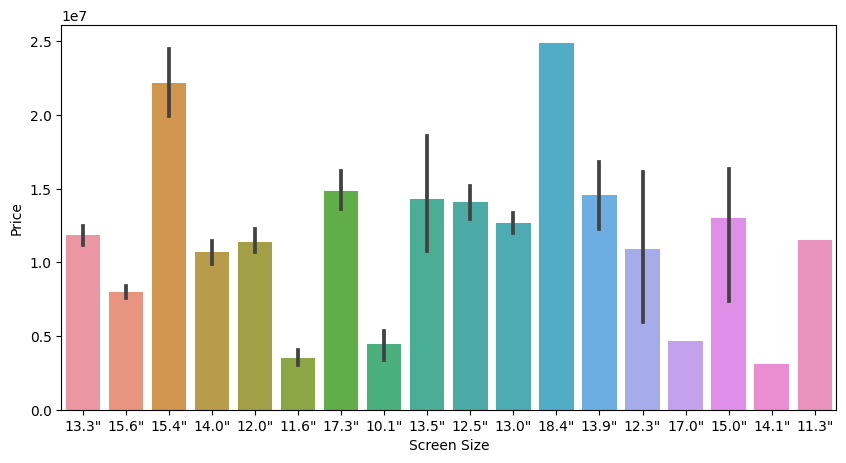

In [571]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Screen Size'],y=df['Price'])

<Axes: >

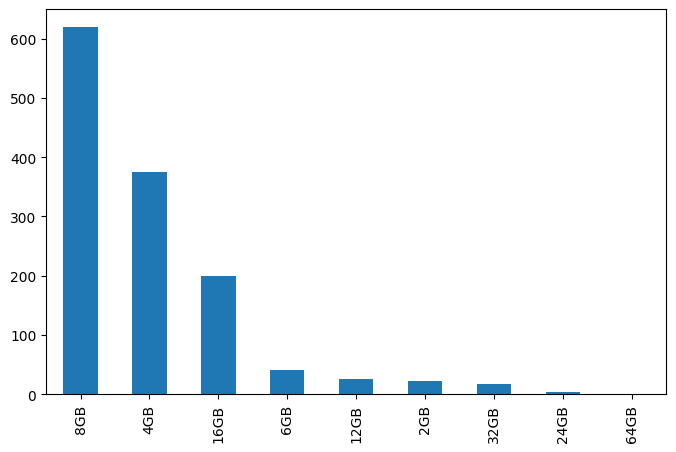

In [572]:
plt.figure(figsize=(8,5))
df['RAM'].value_counts().plot.bar()

<Axes: xlabel='RAM', ylabel='Price'>

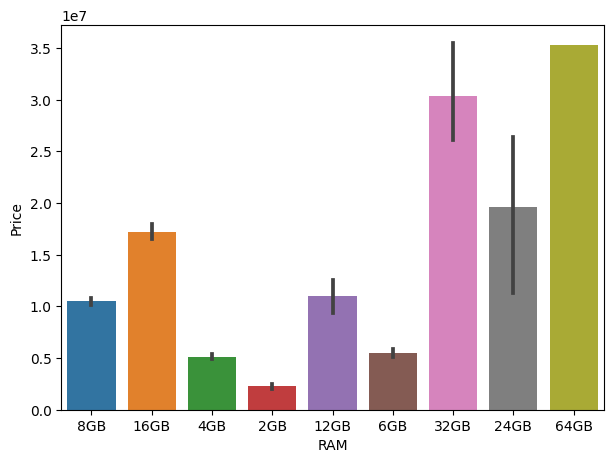

In [573]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['RAM'],y=df['Price'])

<Axes: >

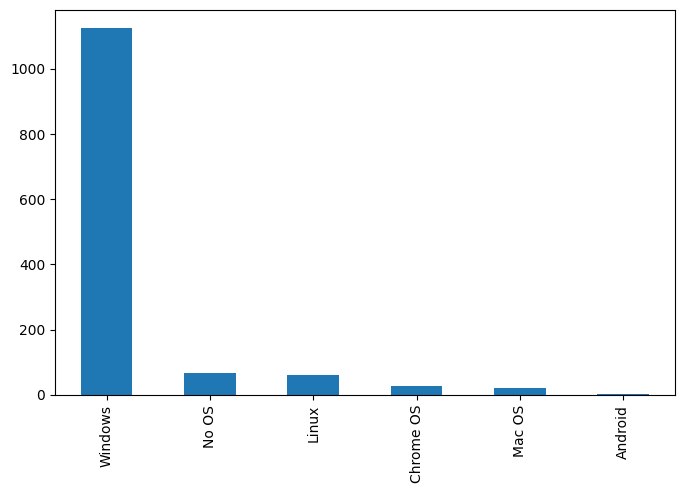

In [574]:
plt.figure(figsize=(8,5))
df['Operating System'].value_counts().plot.bar()

<Axes: xlabel='Operating System', ylabel='Price'>

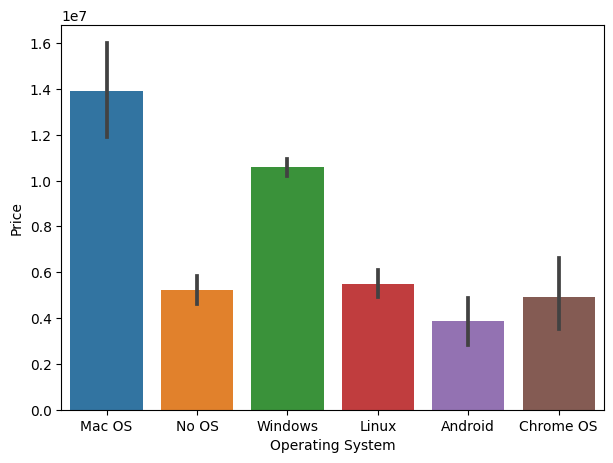

In [575]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Operating System'],y=df['Price'] )

<Axes: xlabel='Weight', ylabel='Price'>

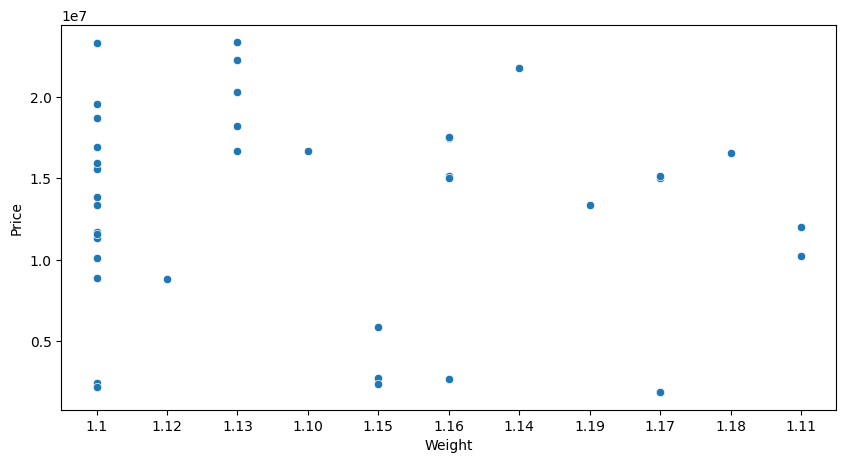

In [576]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Weight'].sort_values()[30:70],y=df['Price'])

In [577]:
df['Weight'].sort_values()[:5]

50      0.69
1125    0.69
1081    0.69
1113    0.69
812     0.81
Name: Weight, dtype: object

<Axes: xlabel='Screen type', ylabel='Price'>

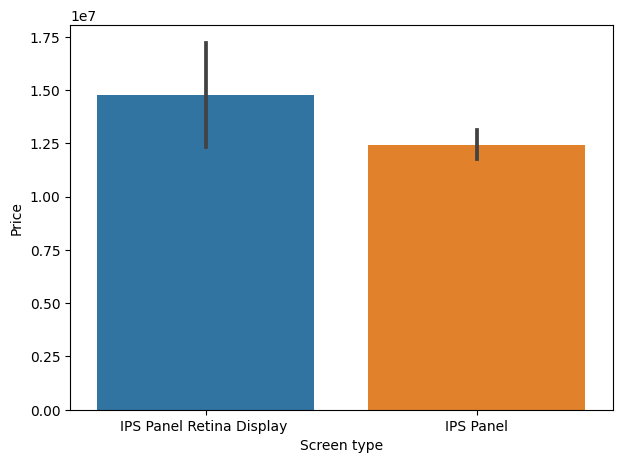

In [578]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Screen type'],y=df['Price'] )

In [579]:
df[df['Screen type'] == 'IPS Panel Retina Display ']['Manufacturer']

0       Apple
3       Apple
4       Apple
6       Apple
12      Apple
14      Apple
15      Apple
17      Apple
45      Apple
81      Apple
249     Apple
270     Apple
421     Chuwi
794     Apple
1068    Apple
1192    Apple
1209    Apple
Name: Manufacturer, dtype: object

<Axes: xlabel='Resolution', ylabel='Price'>

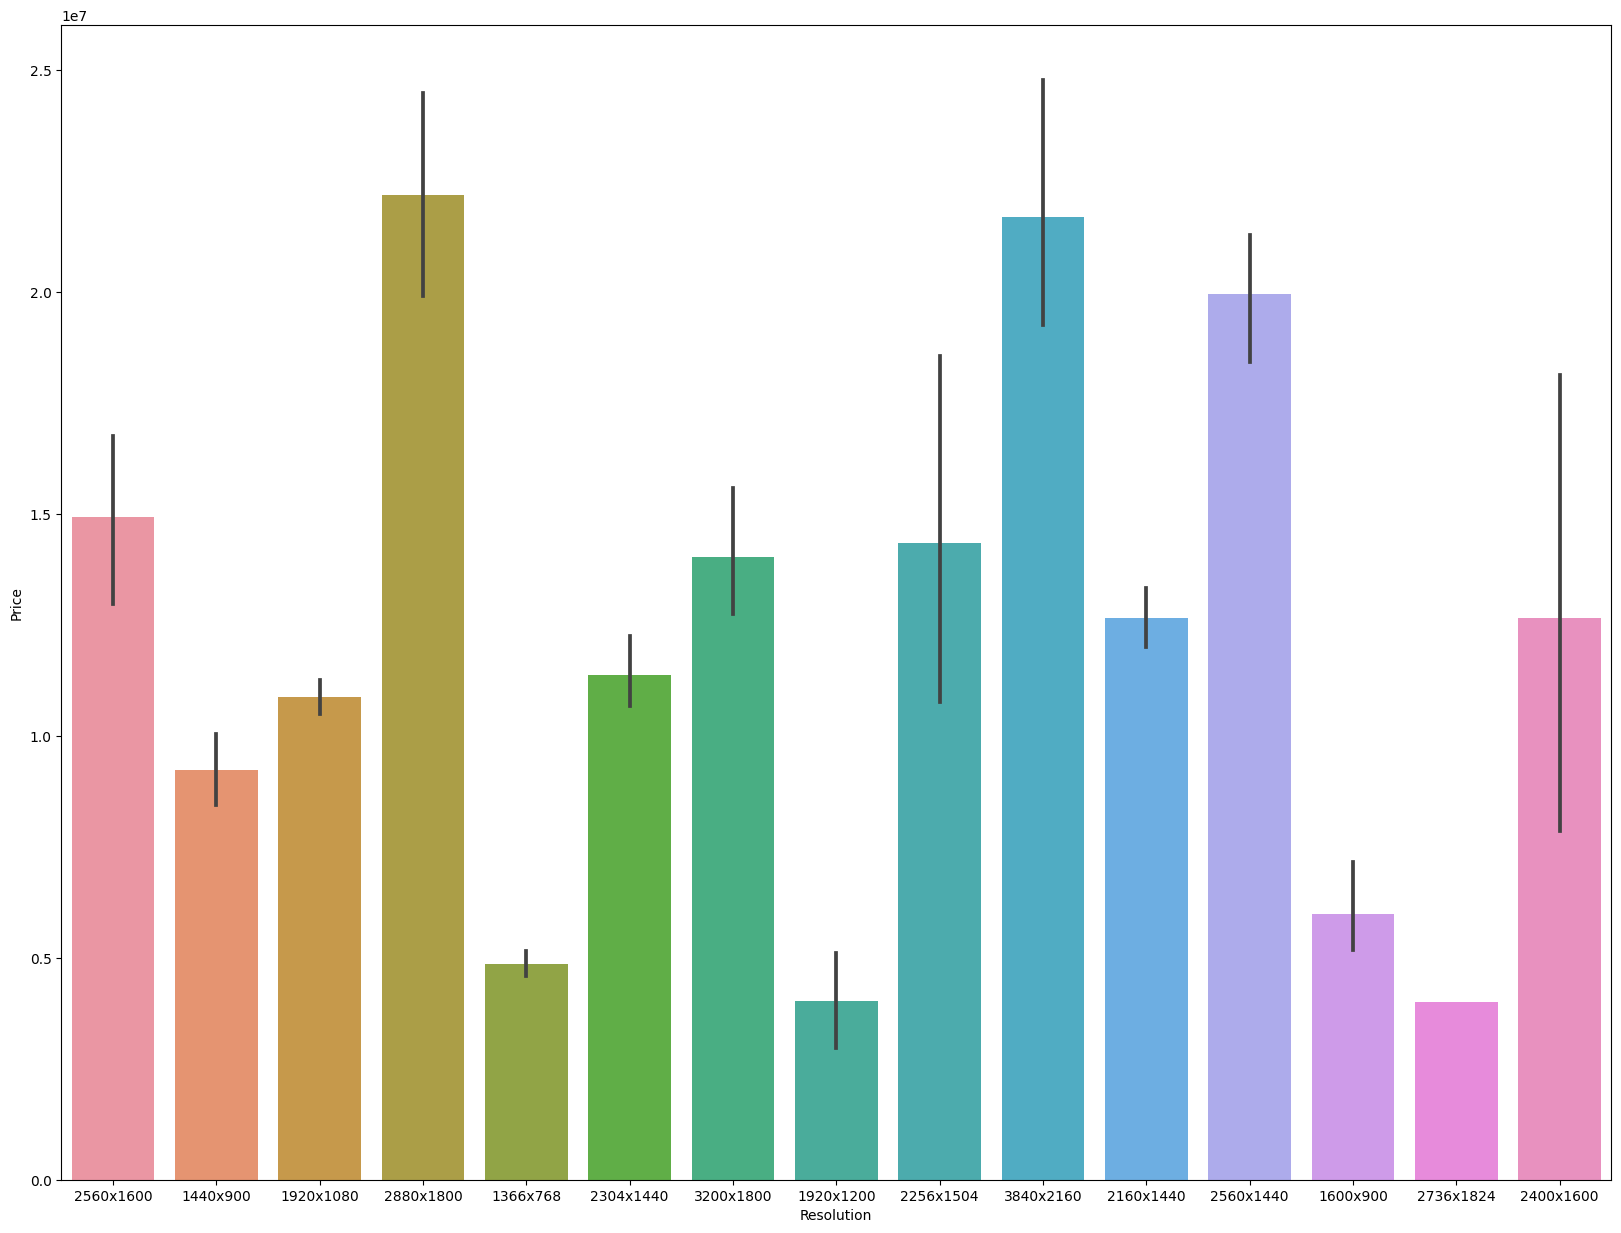

In [580]:
plt.figure(figsize=(20,15))
sns.barplot(x=df['Resolution'],y=df['Price'] )

In [581]:
df[df['Resolution']== '2560x1440']['Manufacturer'].sort_values()

424       Dell
971       Dell
939       Dell
1235        HP
1158        HP
1143        HP
1148    Lenovo
1139    Lenovo
1079    Lenovo
1049    Lenovo
831     Lenovo
190     Lenovo
720     Lenovo
693     Lenovo
469     Lenovo
438     Lenovo
411     Lenovo
399     Lenovo
389     Lenovo
385     Lenovo
273     Lenovo
1179    Lenovo
795     Lenovo
Name: Manufacturer, dtype: object

<Axes: xlabel='Touchscreen', ylabel='Price'>

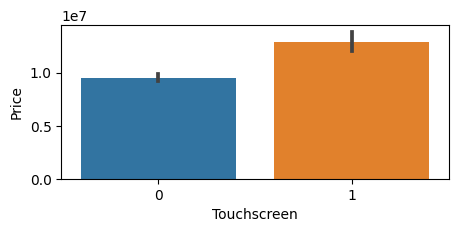

In [582]:
plt.figure(figsize=(5,2))
sns.barplot(x=df['Touchscreen'],y=df['Price'] )

In [583]:
df[df['Touchscreen'] == 1]['Manufacturer'].value_counts().sum()

191

In [584]:
191/1302

0.14669738863287252

In [585]:
df[df['Manufacturer']=='Dell']['Touchscreen'].value_counts()

0    233
1     64
Name: Touchscreen, dtype: int64

<Axes: xlabel='CPU Name', ylabel='Price'>

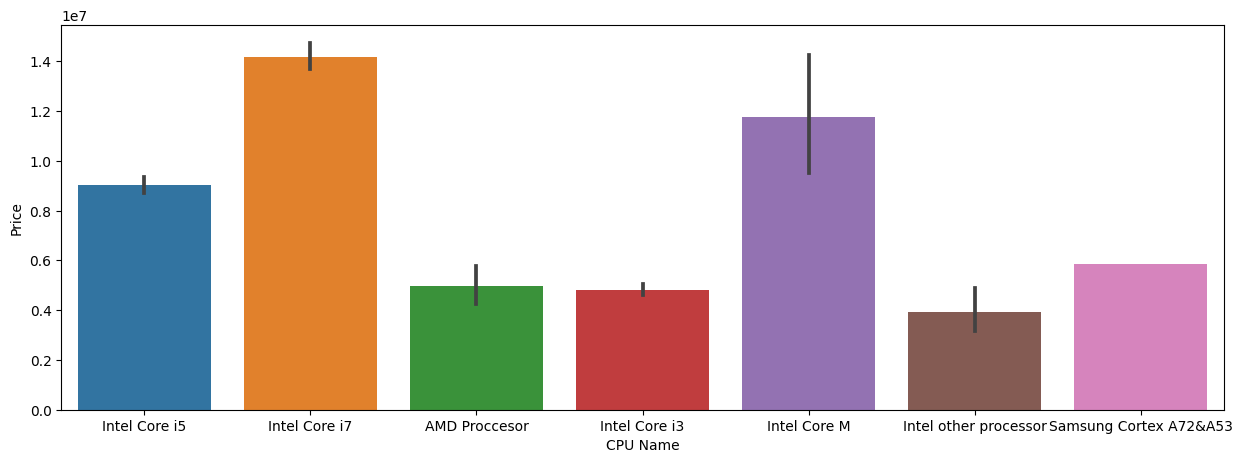

In [586]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['CPU Name'],y=df['Price'] )

In [587]:
1239/1302

0.9516129032258065

<Axes: xlabel='Storage GB', ylabel='Price'>

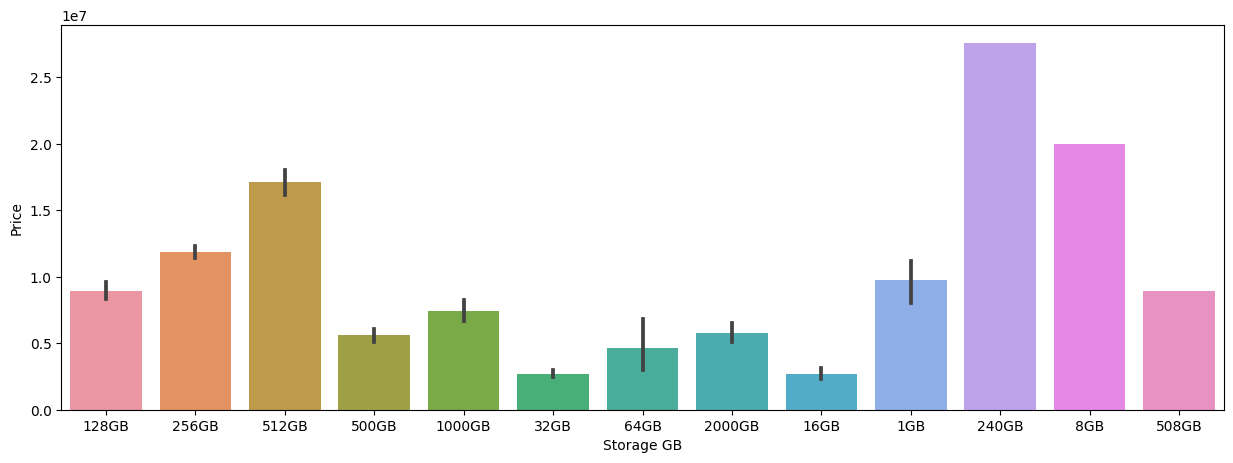

In [588]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Storage GB'],y=df['Price'] )

In [589]:
for i in df['Storage GB'].unique():
    print(df[df['Storage GB'] == i]['Manufacturer'].value_counts().sum())
    print(i)
    print('---'*10)

177
128GB
------------------------------
508
256GB
------------------------------
139
512GB
------------------------------
132
500GB
------------------------------
250
1000GB
------------------------------
45
32GB
------------------------------
17
64GB
------------------------------
16
2000GB
------------------------------
10
16GB
------------------------------
5
1GB
------------------------------
1
240GB
------------------------------
1
8GB
------------------------------
1
508GB
------------------------------


<Axes: xlabel='Storage Type', ylabel='Price'>

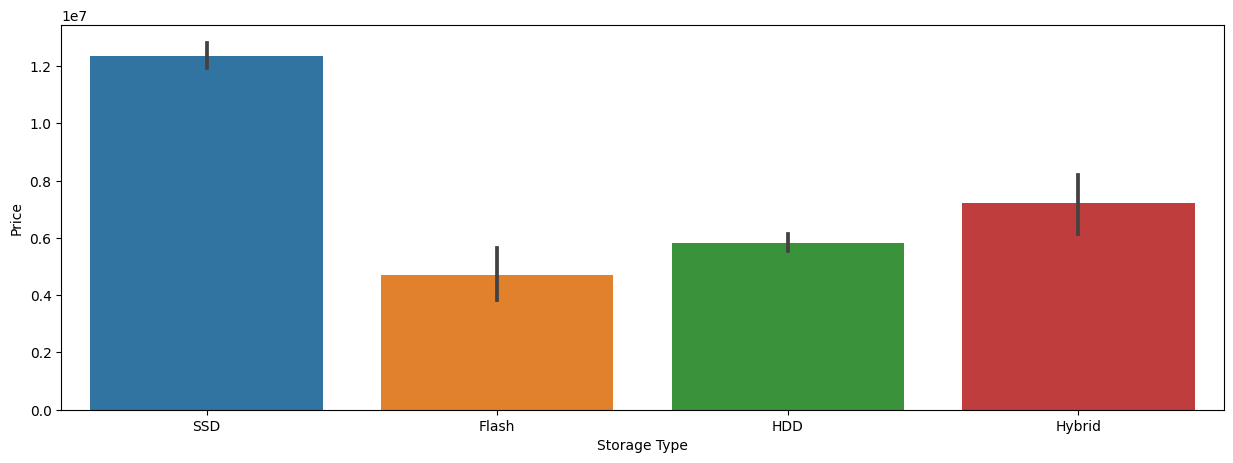

In [590]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Storage Type'],y=df['Price'] )

In [591]:
df['Storage Type'].value_counts()

SSD       842
HDD       375
Flash      75
Hybrid     10
Name: Storage Type, dtype: int64

In [592]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

<Axes: xlabel='GPU Brand', ylabel='Price'>

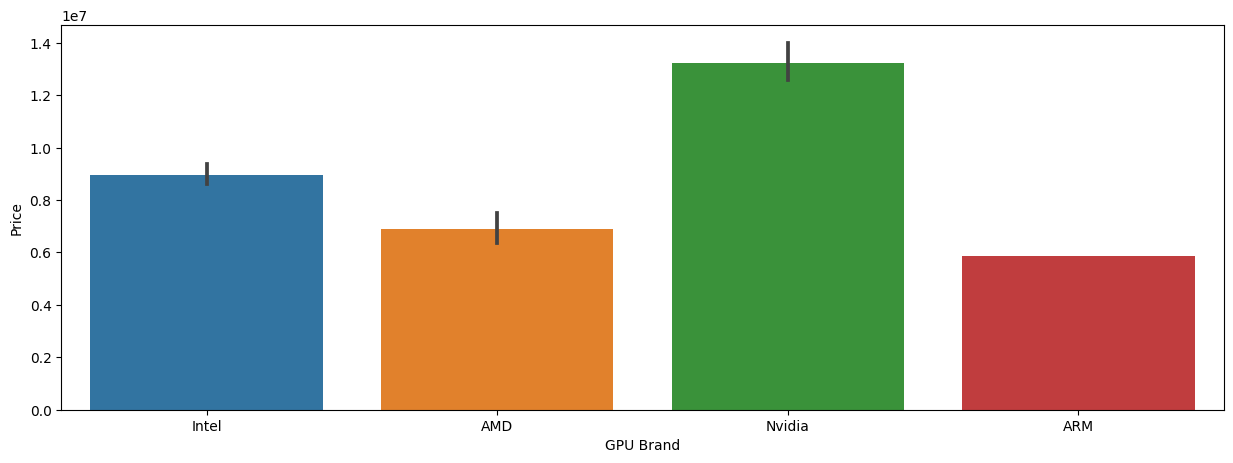

In [593]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['GPU Brand'],y=df['Price'] )

In [594]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'RAM',
       'Operating System', 'Operating System Version', 'Weight', 'Price',
       'Screen type', 'Resolution', 'Touchscreen', 'CPU Name', 'Storage GB',
       'Storage Type', 'GPU Brand'],
      dtype='object')

### Observations 

In [595]:
## Screen type has 71% of  missing values 
## Operation sys version has 13 % of missing values 
## Razor is the costliet laptop than comes LG aprox 62% lesser than razor followed by MSI, Apple, Microsoft, Google
## Workstation laptops are highly priced , mostly manufactured by HP and Dell ,
## Dell, HP, Lenovo top 3 companies for most of the category 
## For gaming ASUS, MSI are top campanies 
## Prices are high for 18.4 inch and 15.4 inch whereas most prefered is 15.6 inch which is way lesser than these two 
## Most prefered RAM is 8GB 
## Most Laptops has windows os 
## Mac os is highly priced 
## Weight doesn't affect the price 
## Apple uses IPS Panel Retina Display, the price is high 
## 2880x1800 resolution is highly priced produced by apple 
## 3840x2160 second highest, highly preffered by Dell and some companies 
## 2560x1440 mostly preferred by lenovo 
## prices are high for touchscreen laptops 
## only 14% of laptops have touchscreen
## Intel processor price are high
## 95% of company uses Intel processor 
## highest priced is 240GB laptop but 256GB price is lesser than that, 500 and 1Tb are comparitively lesser than this
## Most laptops have SSD and HDD, SSD cost way more than HDD
## Nivdia GPU is priced higher whereas most laptops have Intel GPU which is second highest

### Feature Engeneering

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   RAM                       1302 non-null   object 
 5   Operating System          1302 non-null   object 
 6   Operating System Version  1132 non-null   object 
 7   Weight                    1302 non-null   object 
 8   Price                     1302 non-null   float64
 9   Screen type               365 non-null    object 
 10  Resolution                1302 non-null   object 
 11  Touchscreen               1302 non-null   object 
 12  CPU Name                  1302 non-null   object 
 13  Storage GB                1302 non-null   object 
 14  Storage 

In [597]:
df['RAM'] = (df['RAM'].str.split('G').str[0]).astype(int)

In [598]:
df['Weight'] = df['Weight'].astype(float)

In [599]:
df['Touchscreen'] = df['Touchscreen'].astype(int)

In [600]:
df['Storage GB'] = df['Storage GB'].str.split('G').str[0].astype(int)

In [601]:
df['Screen Size'] = df['Screen Size'].str.split('"').str[0].astype(float)

In [602]:
df['Operating System Version'].fillna('10',inplace = True)

In [603]:
df['Screen type'].fillna('0',inplace = True)

In [604]:
df['IPS'] = df['Screen type'].apply(lambda x : 1 if 'IPS Panel' in x else 0)

In [605]:
df['IPS'].value_counts()

0    937
1    365
Name: IPS, dtype: int64

In [606]:
df.drop('Screen type',inplace = True,axis = 1)

In [607]:
df['x_reolution'] = df['Resolution'].str.split('x').str[0].astype(int)
df['y_reolution'] = df['Resolution'].str.split('x').str[1].astype(int)

In [608]:
df['PPI'] = (df['x_reolution']**2)+(df['y_reolution']**2)**0.5/df['Screen Size']

In [609]:
df['PPI']

0       6.553720e+06
1       2.073668e+06
2       3.686469e+06
3       8.294517e+06
4       6.553720e+06
            ...     
1297    3.686477e+06
1298    1.024014e+07
1299    1.866011e+06
1300    1.866005e+06
1301    1.866005e+06
Name: PPI, Length: 1302, dtype: float64

In [610]:
df.drop('Resolution',inplace = True,axis = 1)

In [611]:
df.drop(['y_reolution','x_reolution'],inplace = True,axis = 1)

In [612]:
df.drop('Screen Size',inplace = True,axis = 1)

In [613]:
df['Storage Type'].value_counts()

SSD       842
HDD       375
Flash      75
Hybrid     10
Name: Storage Type, dtype: int64

In [614]:
df['Storage Type'].unique()

array(['SSD', 'Flash', 'HDD', 'Hybrid'], dtype=object)

In [615]:
df

,Manufacturer,Model Name,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,CPU Name,Storage GB,Storage Type,GPU Brand,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,8,Mac OS,10,1.37,11912523.48,0,Intel Core i5,128,SSD,Intel,1,6.553720e+06
1,Apple,Macbook Air,Ultrabook,8,Mac OS,10,1.34,7993374.48,0,Intel Core i5,128,Flash,Intel,0,2.073668e+06
2,HP,250 G6,Notebook,8,No OS,10,1.86,5112900.00,0,Intel Core i5,256,SSD,Intel,0,3.686469e+06
3,Apple,MacBook Pro,Ultrabook,16,Mac OS,10,1.83,22563005.40,0,Intel Core i7,512,SSD,AMD,1,8.294517e+06
4,Apple,MacBook Pro,Ultrabook,8,Mac OS,10,1.37,16037611.20,0,Intel Core i5,256,SSD,Intel,1,6.553720e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,Windows,10,1.80,5673096.00,1,Intel Core i7,128,SSD,Intel,1,3.686477e+06
1298,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,Windows,10,1.30,13329108.00,1,Intel Core i7,512,SSD,Intel,1,1.024014e+07
1299,Lenovo,IdeaPad 100S-14IBR,Notebook,2,Windows,10,1.50,2036268.00,0,Intel other processor,64,Flash,Intel,0,1.866011e+06
1300,HP,15-AC110nv,Notebook,6,Windows,10,2.19,6793488.00,0,Intel Core i7,1000,HDD,AMD,0,1.866005e+06


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   RAM                       1302 non-null   int32  
 4   Operating System          1302 non-null   object 
 5   Operating System Version  1302 non-null   object 
 6   Weight                    1302 non-null   float64
 7   Price                     1302 non-null   float64
 8   Touchscreen               1302 non-null   int32  
 9   CPU Name                  1302 non-null   object 
 10  Storage GB                1302 non-null   int32  
 11  GPU Brand                 1302 non-null   object 
 12  IPS                       1302 non-null   int64  
 13  PPI                       1302 non-null   float64
 14  HDD     

<Axes: >

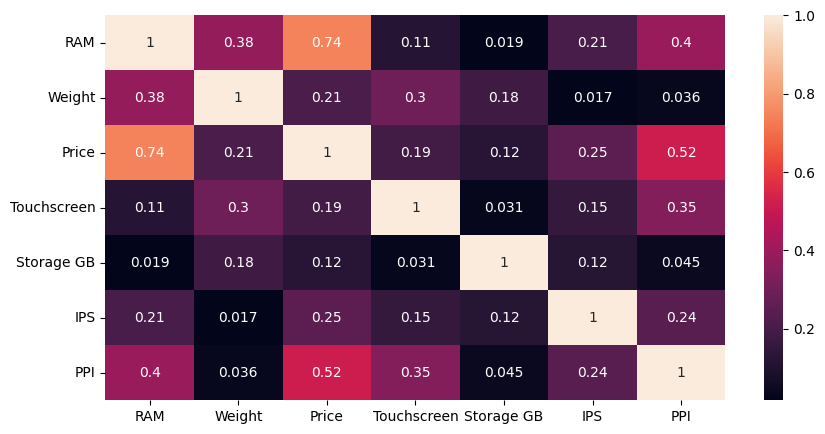

In [616]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs(),annot = True)

###  Observation

In [617]:
## Screen size is droped 
## PPI pixel per inch 
## RAM and PPI is highly corelated with price 
## SSD,HDD impacts price 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


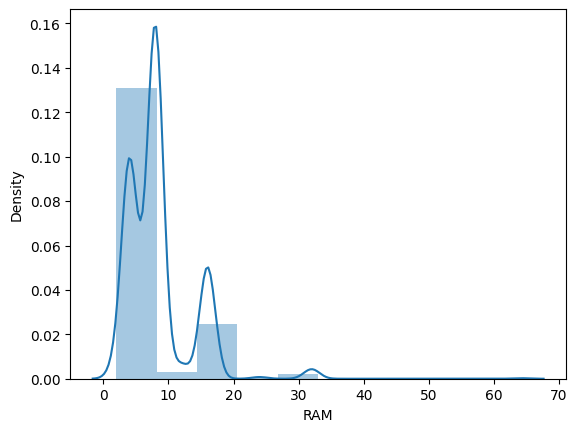

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


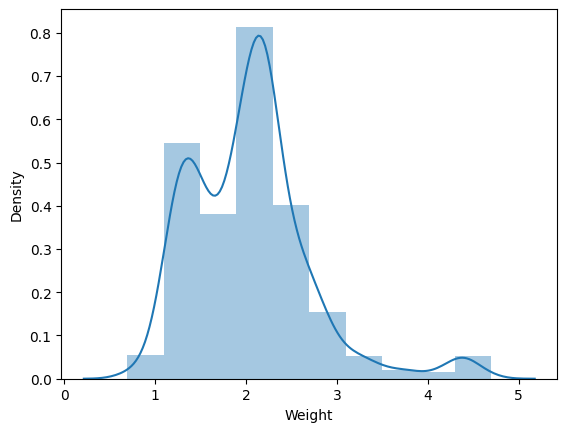

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


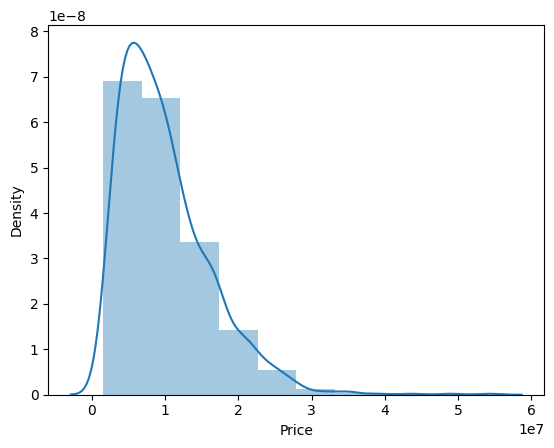

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


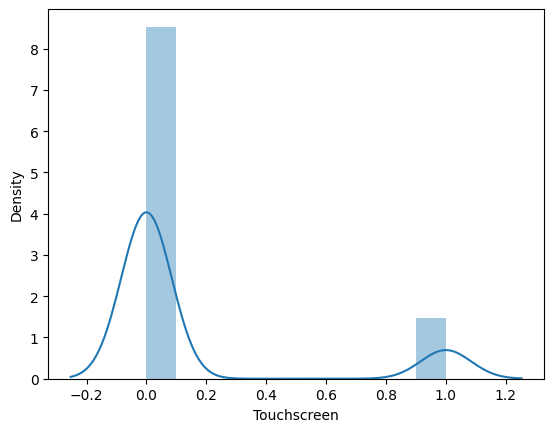

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


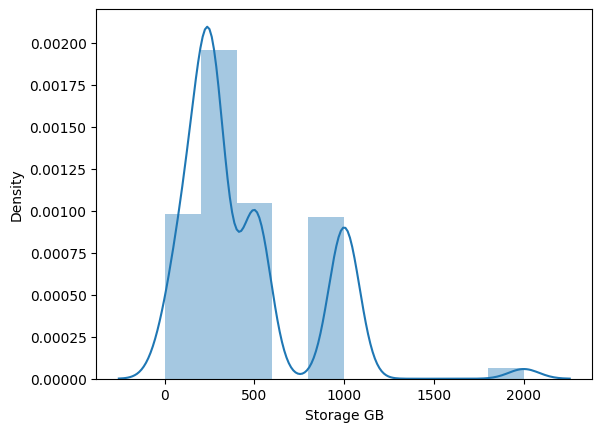

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


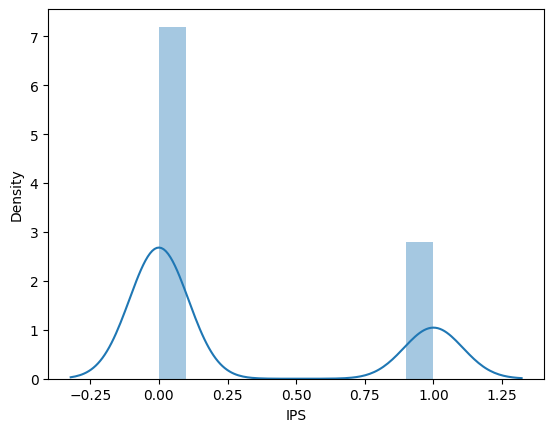

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


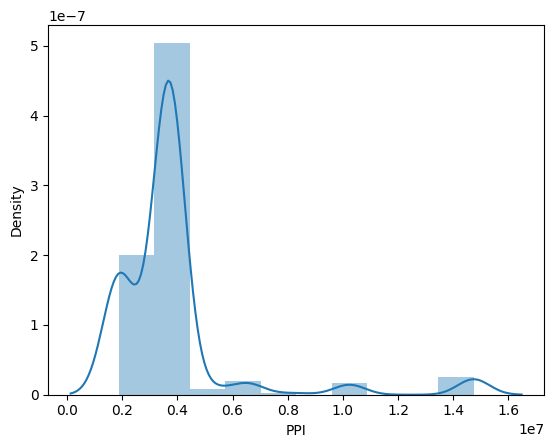

In [618]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.distplot(df[i],bins = 10)
        plt.show()

In [619]:
df['RAM'] = np.log(df['RAM'])

In [620]:
df['Price'] = np.log(df['Price'])

In [621]:
df['PPI'] = np.log(df['PPI'])

<Axes: >

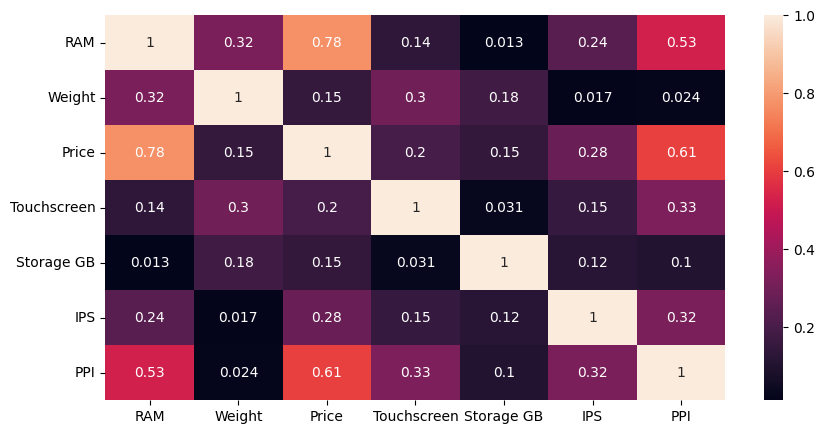

In [622]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs(),annot = True)

#### Corelation between categorical and contineous variable 

In [623]:
cat_feature = [i for i in df.columns  if df[i].dtype == 'O']
# [df[i].value_counts() for i in cat_feature]
cat_feature

['Manufacturer',
 'Model Name',
 'Category',
 'Operating System',
 'Operating System Version',
 'CPU Name',
 'Storage Type',
 'GPU Brand']

In [624]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'RAM', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Touchscreen',
       'CPU Name', 'Storage GB', 'Storage Type', 'GPU Brand', 'IPS', 'PPI'],
      dtype='object')

In [636]:
from scipy.stats import f_oneway

## NUll hypothesis -- The variables are not corelated 

anova_= []

for i in cat_feature:
    CategoryGroupLists=df.groupby(i)['Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    anova_.append(AnovaResults[1])
    print(i,':- P-Value for Anova is: ', AnovaResults[1])
    
## P-values for all variables is almost 0, so we reject null hypo 
## null hypo is accepted only when p value is greater than 0.5

print(anova_)

Manufacturer :- P-Value for Anova is:  1.9954082614230843e-45
Model Name :- P-Value for Anova is:  1.1810480920989887e-257
Category :- P-Value for Anova is:  8.299243962801778e-144
Operating System :- P-Value for Anova is:  2.807925396801772e-35
Operating System Version :- P-Value for Anova is:  3.597304373748913e-07
CPU Name :- P-Value for Anova is:  3.911787515538373e-251
Storage Type :- P-Value for Anova is:  2.061721603566643e-130
GPU Brand :- P-Value for Anova is:  3.8730718391694217e-42
[1.9954082614230843e-45, 1.1810480920989887e-257, 8.299243962801778e-144, 2.807925396801772e-35, 3.597304373748913e-07, 3.911787515538373e-251, 2.061721603566643e-130, 3.8730718391694217e-42]


-- Null hypothesis is a general statement that there is no relationship between two measured phenomena.
-- P value of <0.05, you reject the null hypothesis

#### Independent and dependent features 

In [626]:
X = df.drop('Price',axis = 1)

In [627]:
y = df['Price']

### Standardization

###### No need to scale them as categorical features has 0 and 1 which is boolean not numeric Normalizing such features just amounts to rescaling the positive value.

### Train Test split

In [445]:
from sklearn.model_selection import train_test_split

In [446]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###  Model Training

In [110]:
## model 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import math 

## performance matrix 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### Linear Regression

In [220]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
kf = KFold(n_splits=10)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
score = GridSearchCV(lr,parameters,scoring='neg_mean_squared_error',cv = kf)


## model fitting 

score.fit(X_train,y_train)

print(score.best_score_)
print(score.best_estimator_)
print(score.best_params_)

y_pred = score.predict(X_test)

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remov

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


-0.06407798119514643
LinearRegression(normalize=False)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [221]:
y_test = list(y_test)

for i in range (0,len(y_test)):
    print(f'Actual price {round(y_test[i],3)} --- Predicted price {round(y_pred[i],3)}')

Actual price 15.608 --- Predicted price 15.769
Actual price 16.3 --- Predicted price 16.313
Actual price 16.742 --- Predicted price 16.635
Actual price 16.642 --- Predicted price 16.456
Actual price 15.222 --- Predicted price 15.47
Actual price 16.336 --- Predicted price 16.258
Actual price 16.588 --- Predicted price 17.145
Actual price 16.405 --- Predicted price 16.242
Actual price 16.802 --- Predicted price 17.033
Actual price 14.948 --- Predicted price 15.233
Actual price 14.527 --- Predicted price 14.618
Actual price 16.7 --- Predicted price 16.45
Actual price 16.241 --- Predicted price 16.288
Actual price 16.223 --- Predicted price 16.282
Actual price 16.576 --- Predicted price 16.499
Actual price 15.611 --- Predicted price 15.765
Actual price 14.61 --- Predicted price 14.664
Actual price 15.513 --- Predicted price 15.149
Actual price 16.588 --- Predicted price 16.325
Actual price 16.182 --- Predicted price 15.717
Actual price 15.959 --- Predicted price 15.5
Actual price 16.001 --

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


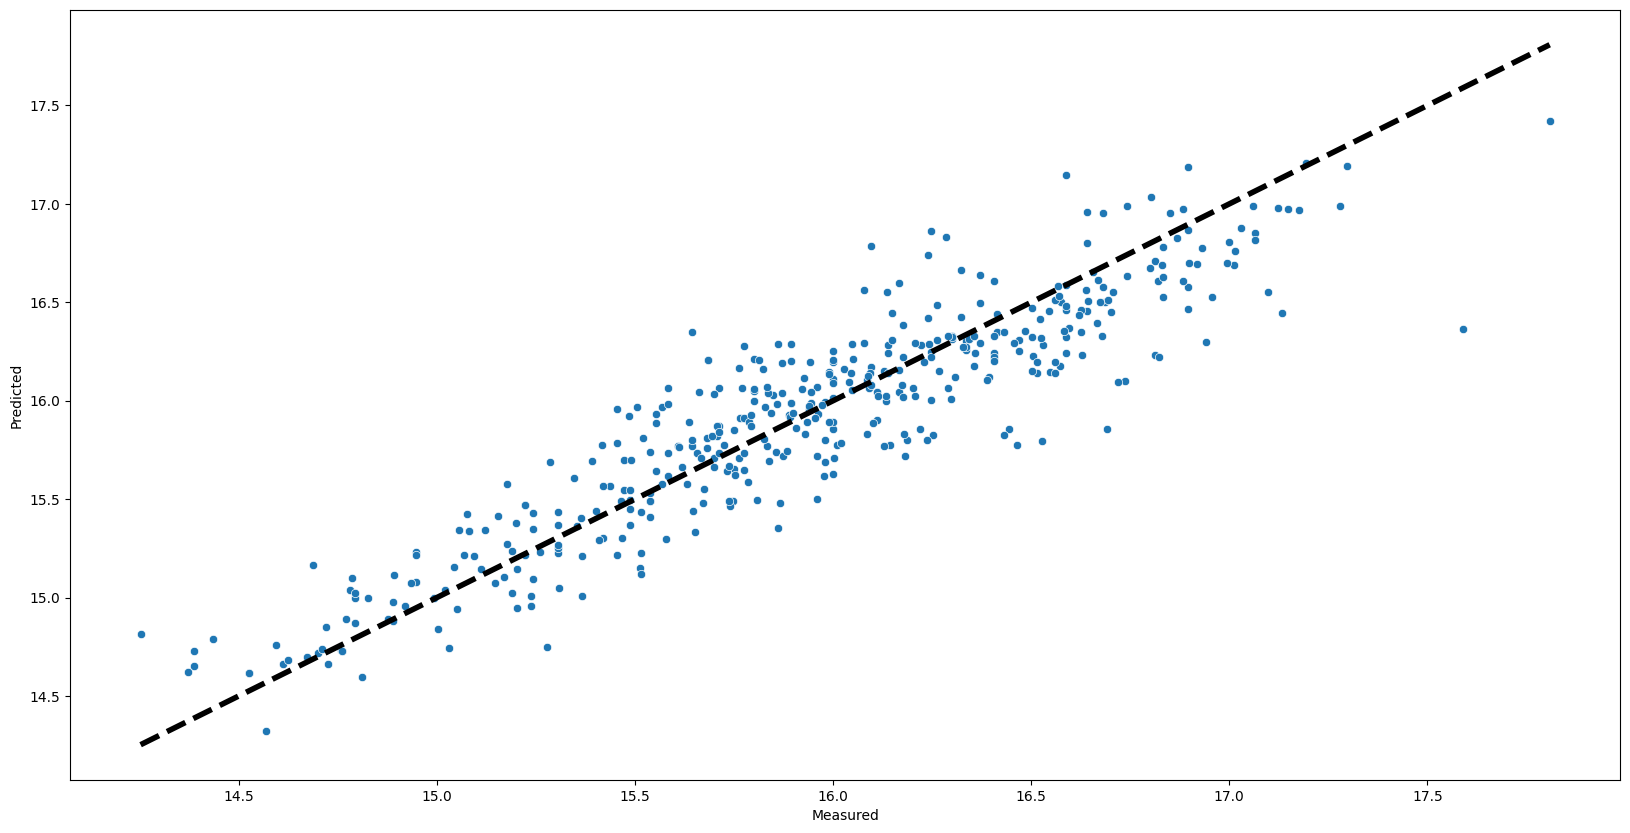

In [222]:
fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Linear Regression 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remov

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be remov

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline


-0.06407798119514643
LinearRegression(normalize=False)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


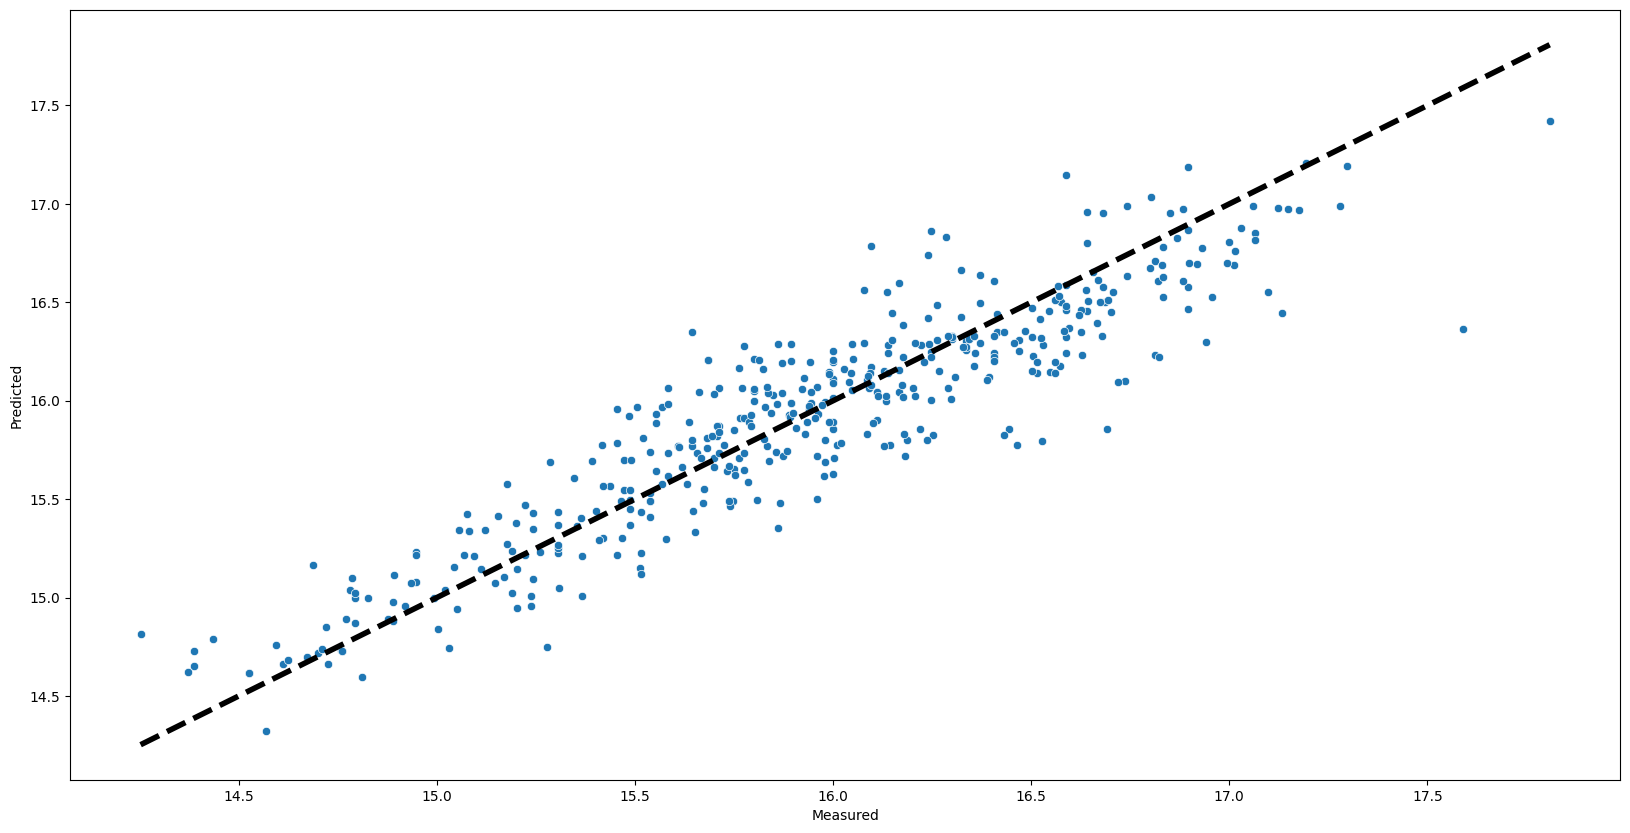

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


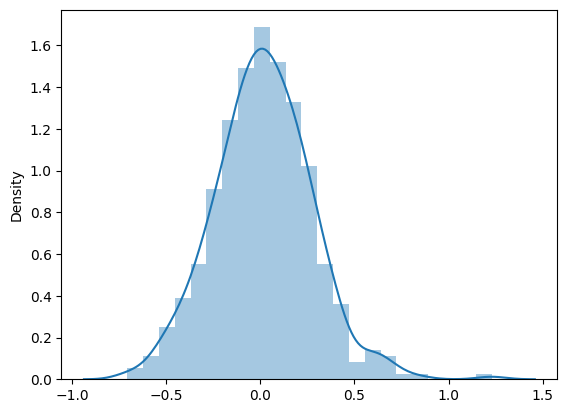

MSE : 0.06674643052524774
MAE : 0.2000923525525077
RMSE: 0.2583533056209031
r2_score : 0.8367750783913321
adjusted r2 : 0.8152414475722467


In [234]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
kf = KFold(n_splits=10)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
score = GridSearchCV(lr,parameters,scoring='neg_mean_squared_error',cv = kf)

## model fitting 

score.fit(X_train,y_train)

## Gridsearchcv bests

best_score = score.best_score_
best_estimator = score.best_estimator_
best_params = score.best_params_

print(best_score)
print(best_estimator)
print(best_params)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

In [224]:
min(y_test), max(y_test)

(14.251962574298616, 17.808787377380543)

In [225]:
x = [5,6,7]
y = [6,7,8]

#### Ridge 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


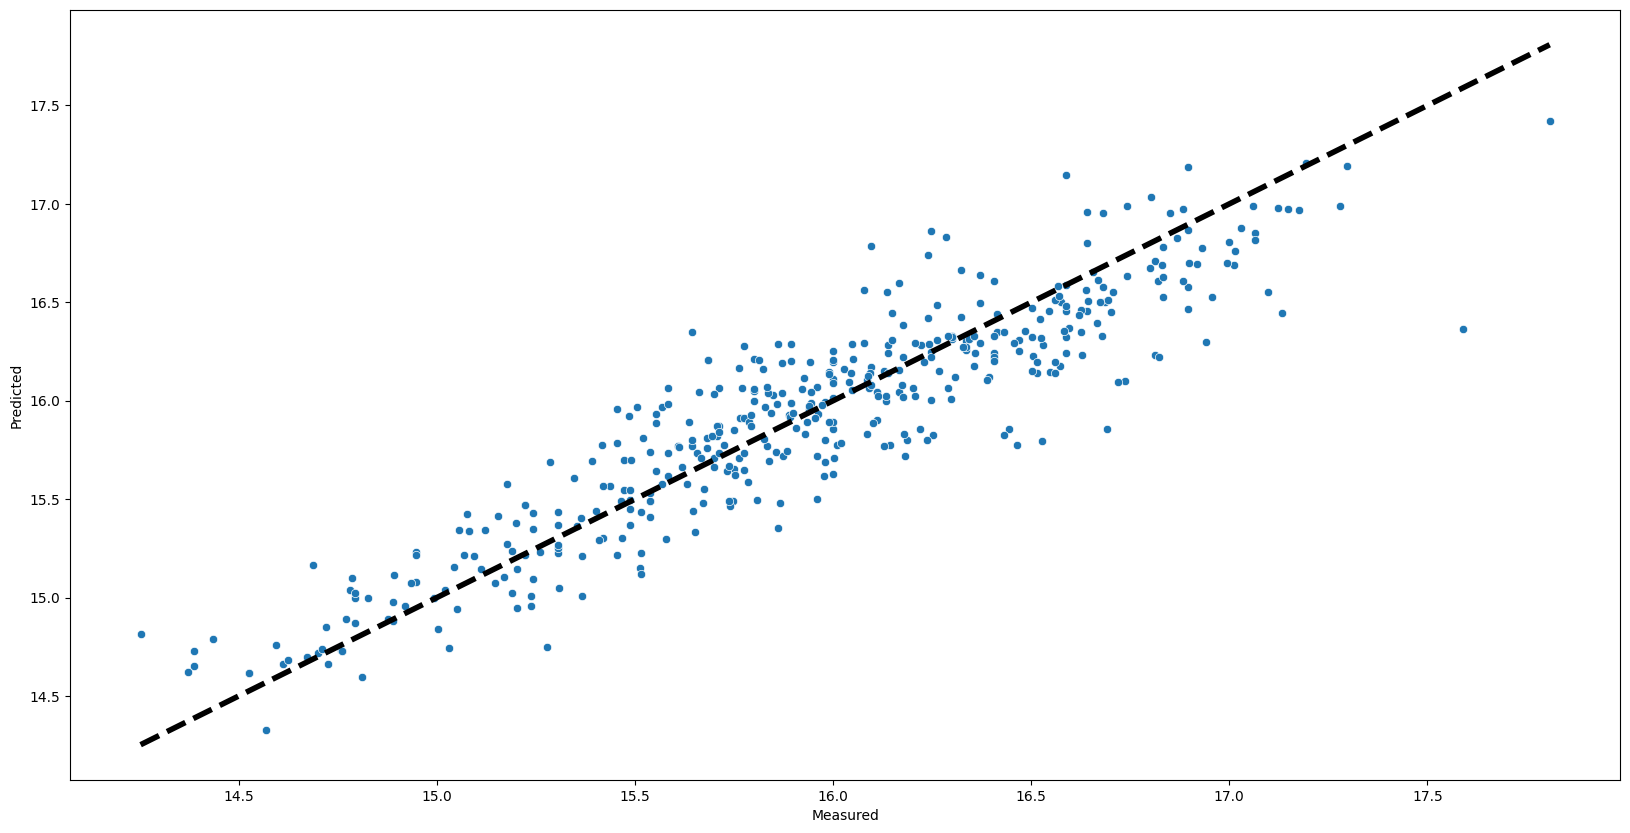

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


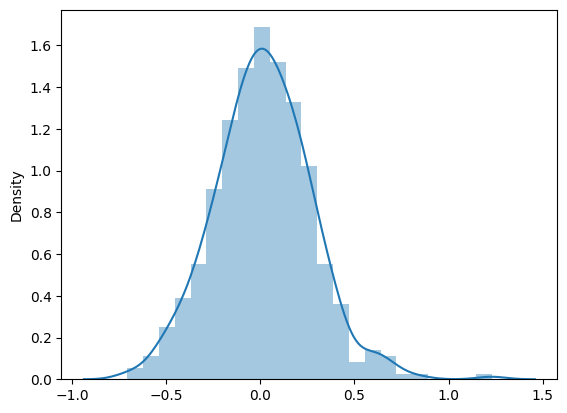

MSE : 0.06674643208941469
MAE : 0.20009228520689565
RMSE: 0.2583533086480889
r2_score : 0.8367750745662433
adjusted r2 : 0.8152414432425288


In [237]:
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': np.arange(1e-4,1e-2),'random_state': [45]}
score = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv = kf)

## model fitting 

score.fit(X_train,y_train)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)


#### Lasso 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+00, tolerance: 2.970e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+01, tolerance: 2.985e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e+

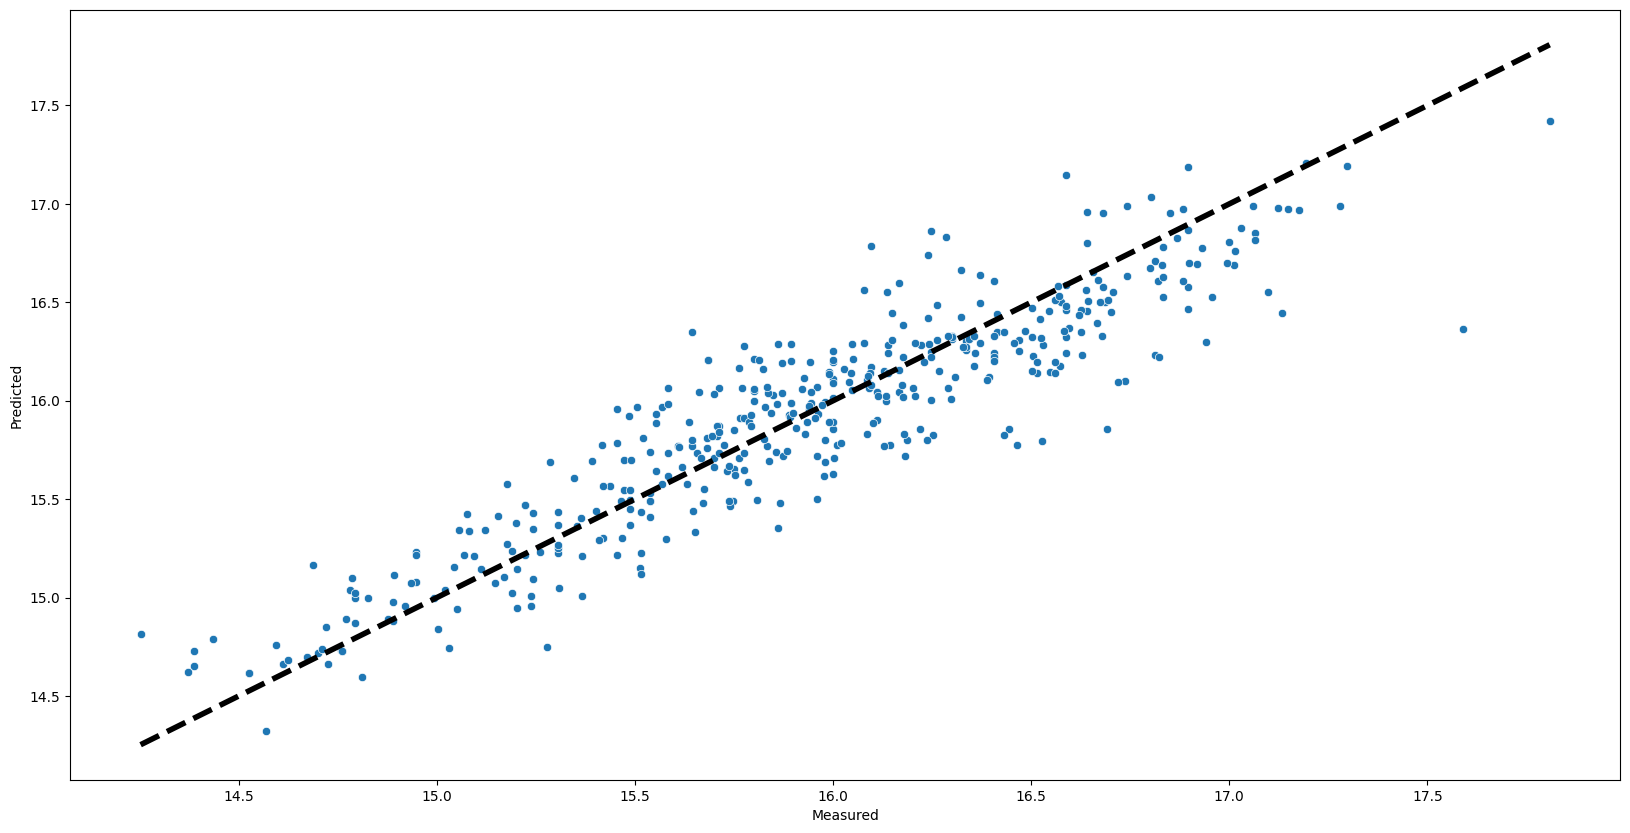

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


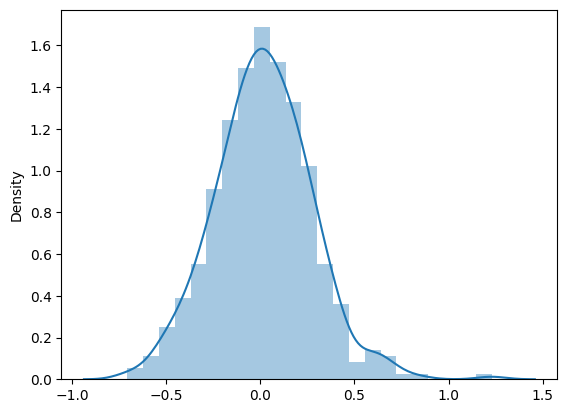

MSE : 0.0667464307017879
MAE : 0.20009235249874968
RMSE: 0.2583533059625673
r2_score : 0.8367750779596124
adjusted r2 : 0.8152414470835718


In [241]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': np.arange(1e-10,1e-2),'max_iter':[1000,1500.2000],'random_state':[45]}
score = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = kf)

## model fitting 

score.fit(X_train,y_train)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### KNN

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


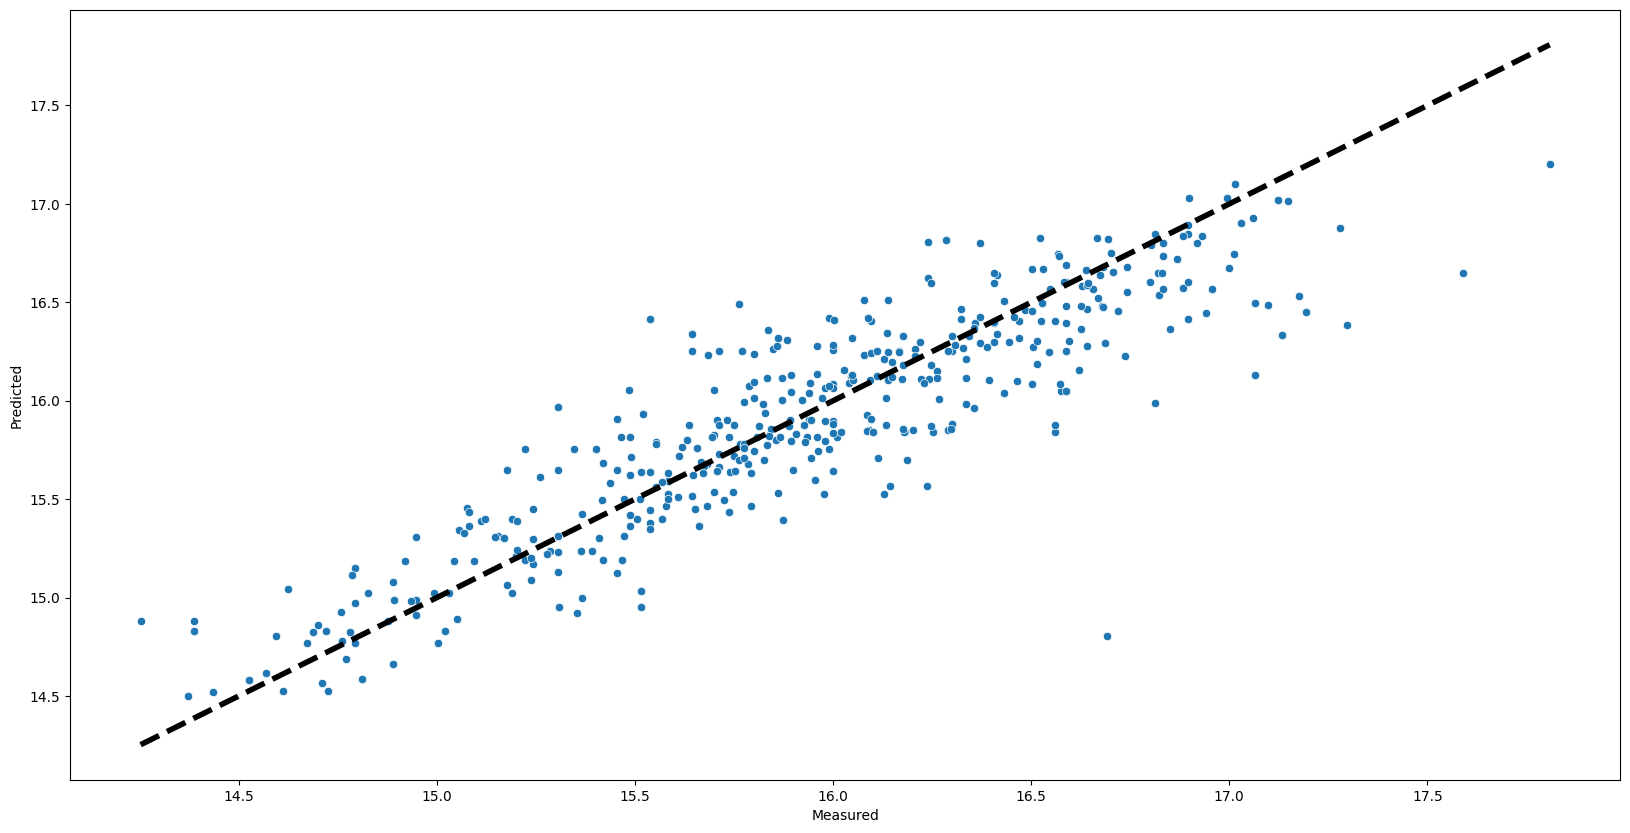

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


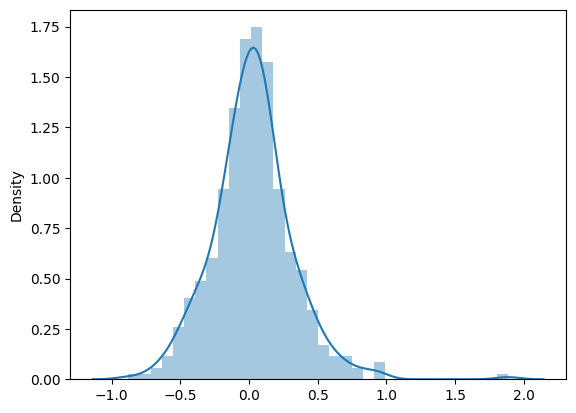

MSE : 0.08557672560930535
MAE : 0.21376276688188933
RMSE: 0.29253499894765644
r2_score : 0.7907265719052697
adjusted r2 : 0.7631179402305032


In [244]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

parameters = {'n_neighbors': [2, 3, 4, 5, 10, 13], 'algorithm' : ['auto','kd_tree']}

score = GridSearchCV(knn,parameters,scoring='neg_mean_squared_error',cv = 5)

## model fitting 

score.fit(X_train,y_train)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### Decision tree 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


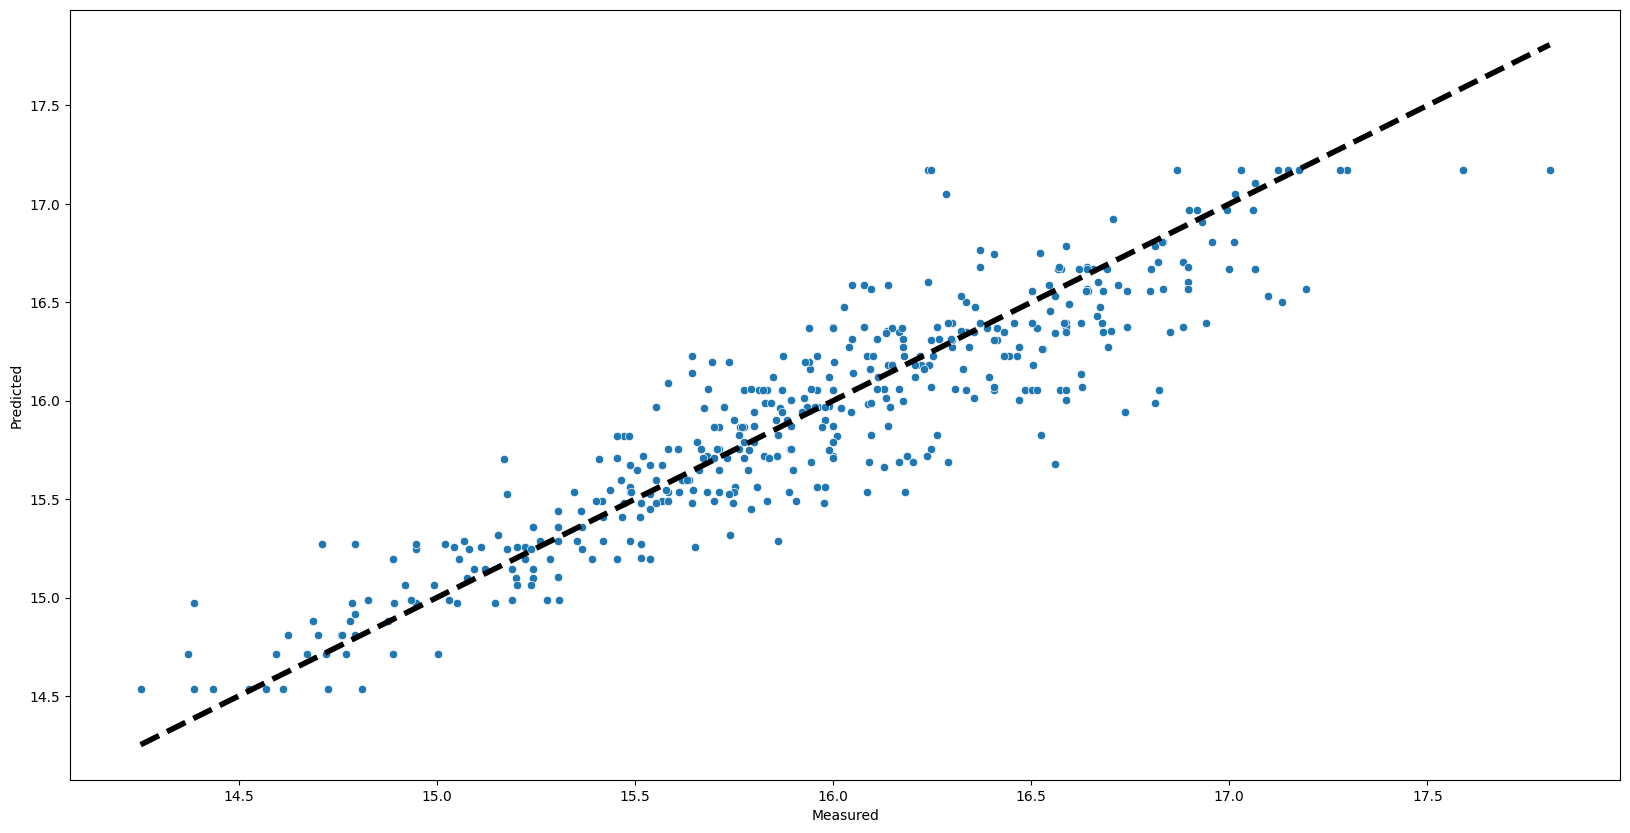

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


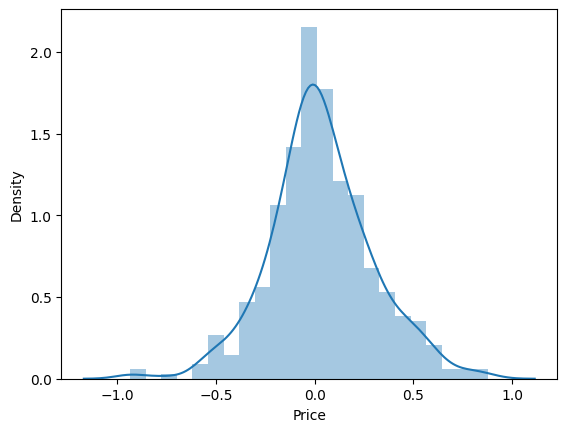

MSE : 0.06989884783233477
MAE : 0.19717746256683968
RMSE: 0.2643839023698961
r2_score : 0.8290660059543806
adjusted r2 : 0.806515347109312


In [117]:
from sklearn.tree import DecisionTreeRegressor

dt_Regressor = DecisionTreeRegressor()

parameters = {'random_state': [32],'min_samples_split': range(16, 20),'max_depth':[15],'max_features':[0.75],'max_samples':[0.5]}
score = GridSearchCV(dt_Regressor,parameters)

## model fitting 

score.fit(X_train,y_train)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### Random Forest

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


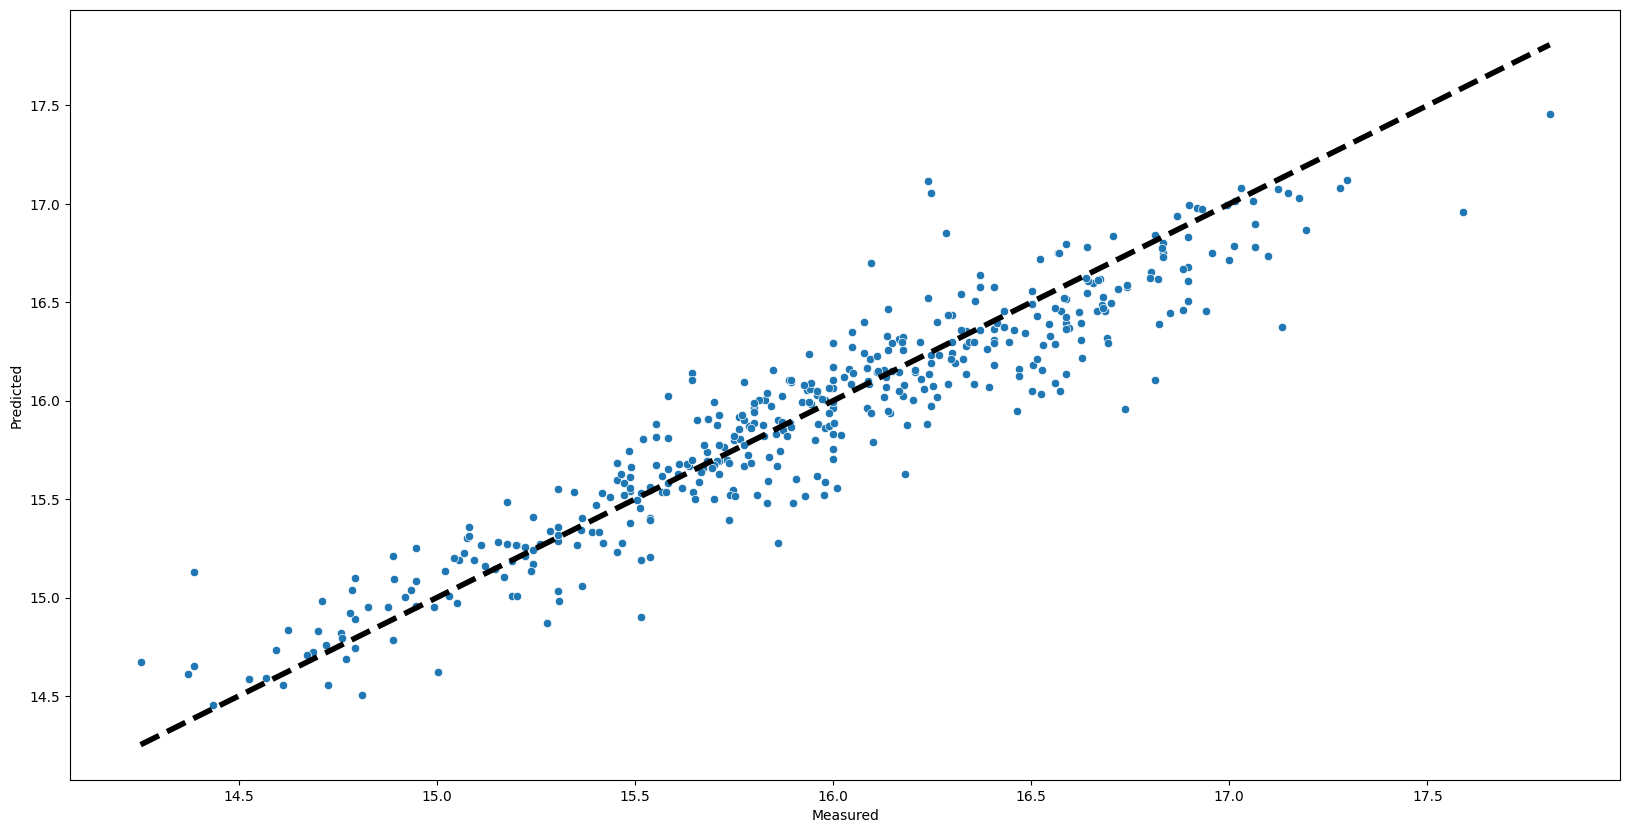

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


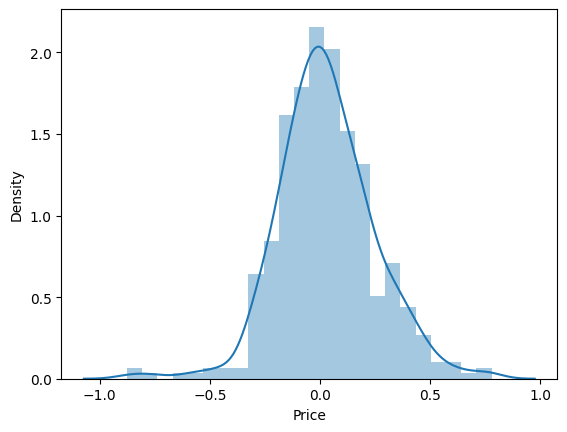

MSE : 0.048865413450553744
MAE : 0.16539398239386965
RMSE: 0.22105522715048775
r2_score : 0.8805021749166837
adjusted r2 : 0.8647372903410483


In [126]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

parameters = {'n_estimators':[57,75,100,112],
                'random_state':[3],'min_samples_split': range(2, 20)}
score = GridSearchCV(rf_regressor,
              param_grid=parameters, cv=5, refit=True)

## model fitting 

score.fit(X_train,y_train)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))

score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### Adaboost 

0.798747014995301
AdaBoostRegressor(learning_rate=0.1, n_estimators=290, random_state=1)
{'learning_rate': 0.1, 'n_estimators': 290, 'random_state': 1}


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


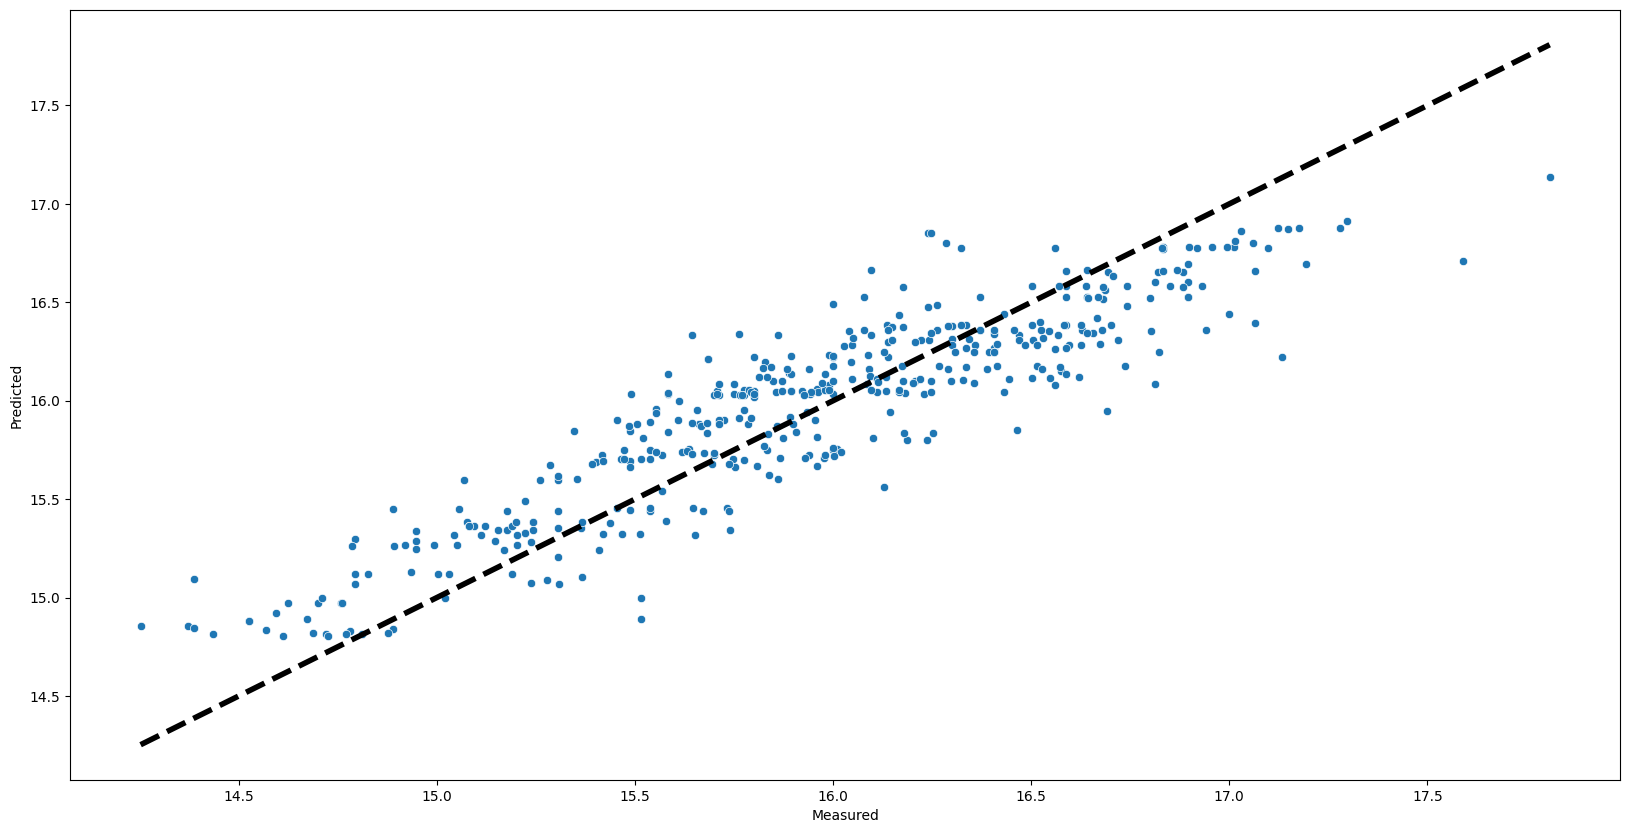

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


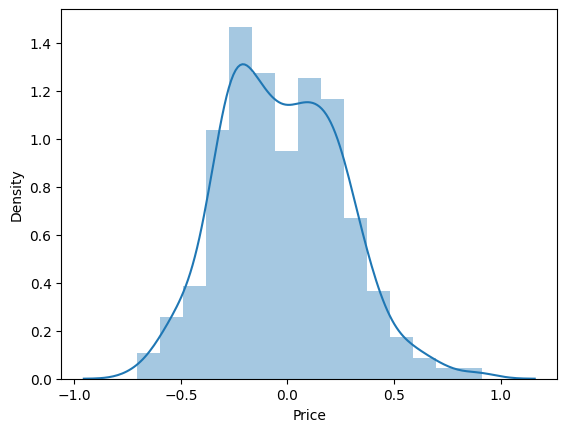

MSE : 0.0784830220420613
MAE : 0.2309525081953596
RMSE: 0.28014821441883453
r2_score : 0.8080738547422233
adjusted r2 : 0.7827537828084796


In [130]:
from sklearn.ensemble import AdaBoostRegressor

ada_bo0st = AdaBoostRegressor()

parameters={'n_estimators':[275,300,305,290],'learning_rate':[.001,0.01,.1],'random_state':[1]}

score = GridSearchCV(ada_bo0st,param_grid=parameters, cv=5, refit=True)

## model fitting 

score.fit(X_train,y_train)

print(score.best_score_)
print(score.best_estimator_)
print(score.best_params_)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))

score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### Gradiant boost 

0.8876903551812736
GradientBoostingRegressor(alpha=0.3, max_depth=5, min_samples_leaf=5,
                          n_estimators=224, random_state=30)
{'alpha': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 224, 'random_state': 30}


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


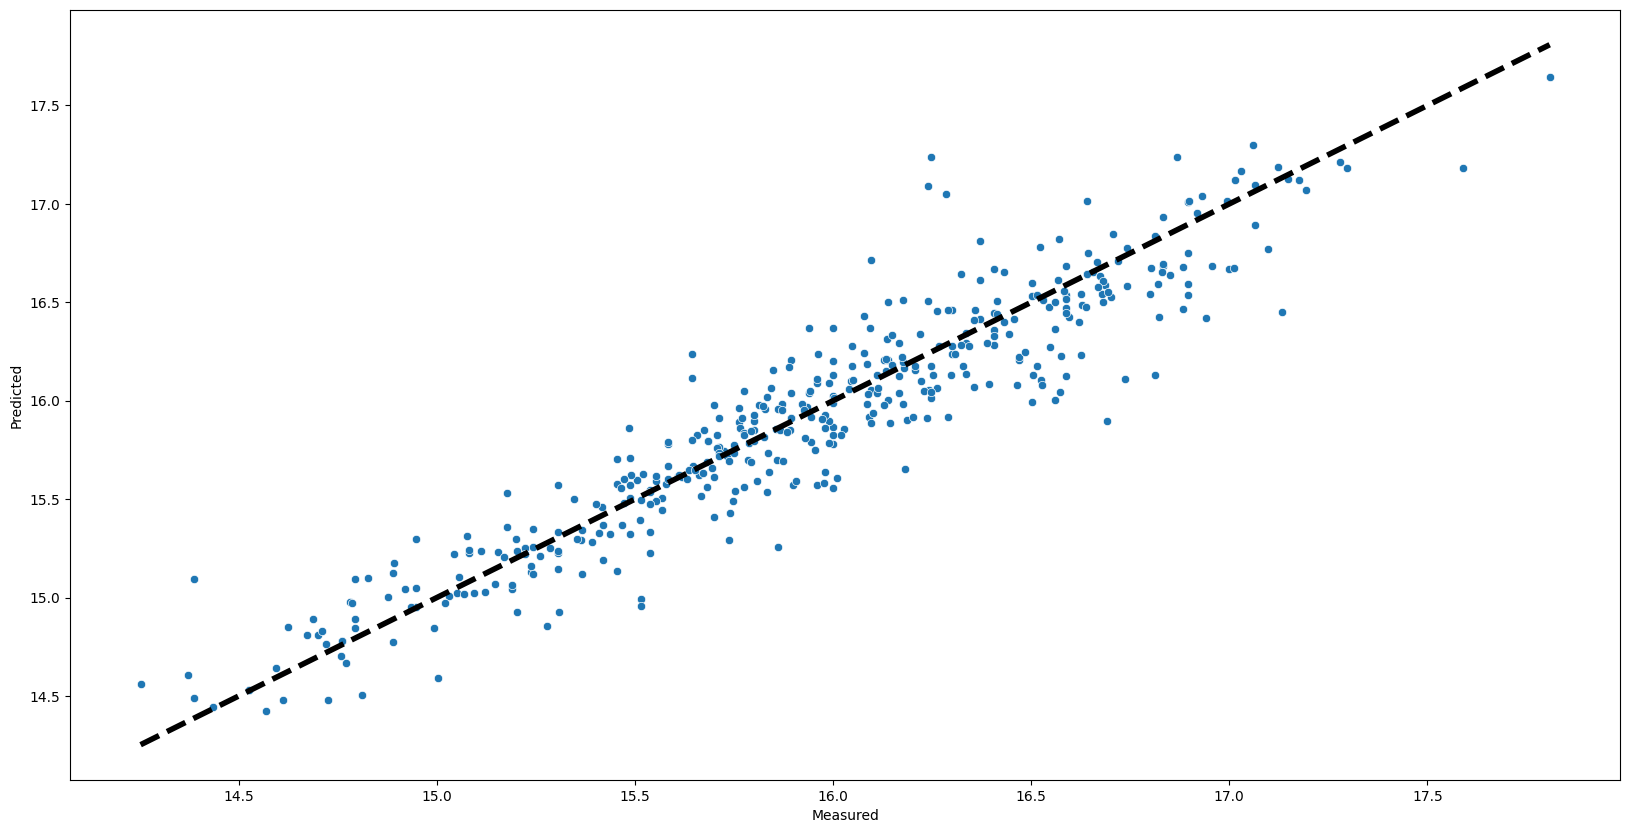

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


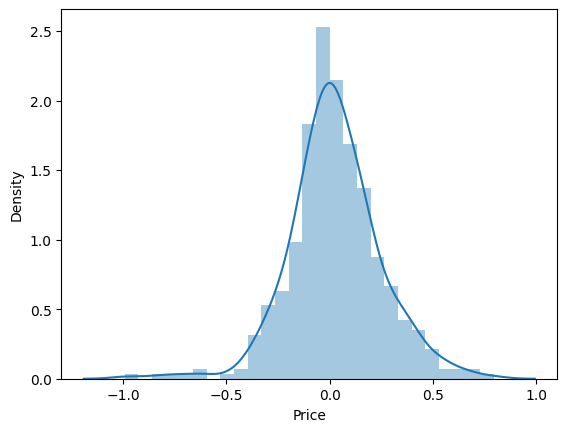

MSE : 0.049938634366695024
MAE : 0.16354417394446724
RMSE: 0.2234695378943068
r2_score : 0.8778776690288418
adjusted r2 : 0.8617665435709053


In [133]:
from sklearn.ensemble import GradientBoostingRegressor

gd_booster = GradientBoostingRegressor()

parameters = {'alpha': np.arange(0.3,1,0.3),'learning_rate': [.001,0.01,.1], 'max_depth': [2,4,5], 
             'min_samples_leaf': [5,4,6], 'min_samples_split': [2,3,4], 'n_estimators': [200,208,219,224], 'random_state': [30]}

score = GridSearchCV(gd_booster,param_grid=parameters, cv=5, refit=True)


## model fitting 

score.fit(X_train,y_train)

print(score.best_score_)
print(score.best_estimator_)
print(score.best_params_)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))

score = r2_score(y_test,y_pred)
print('r2_score :',score)

adjr2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

#### XG boost

0.8938803144601829
XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, ...)
{'alpha': 0.1, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 250, 'random_state': 30}


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


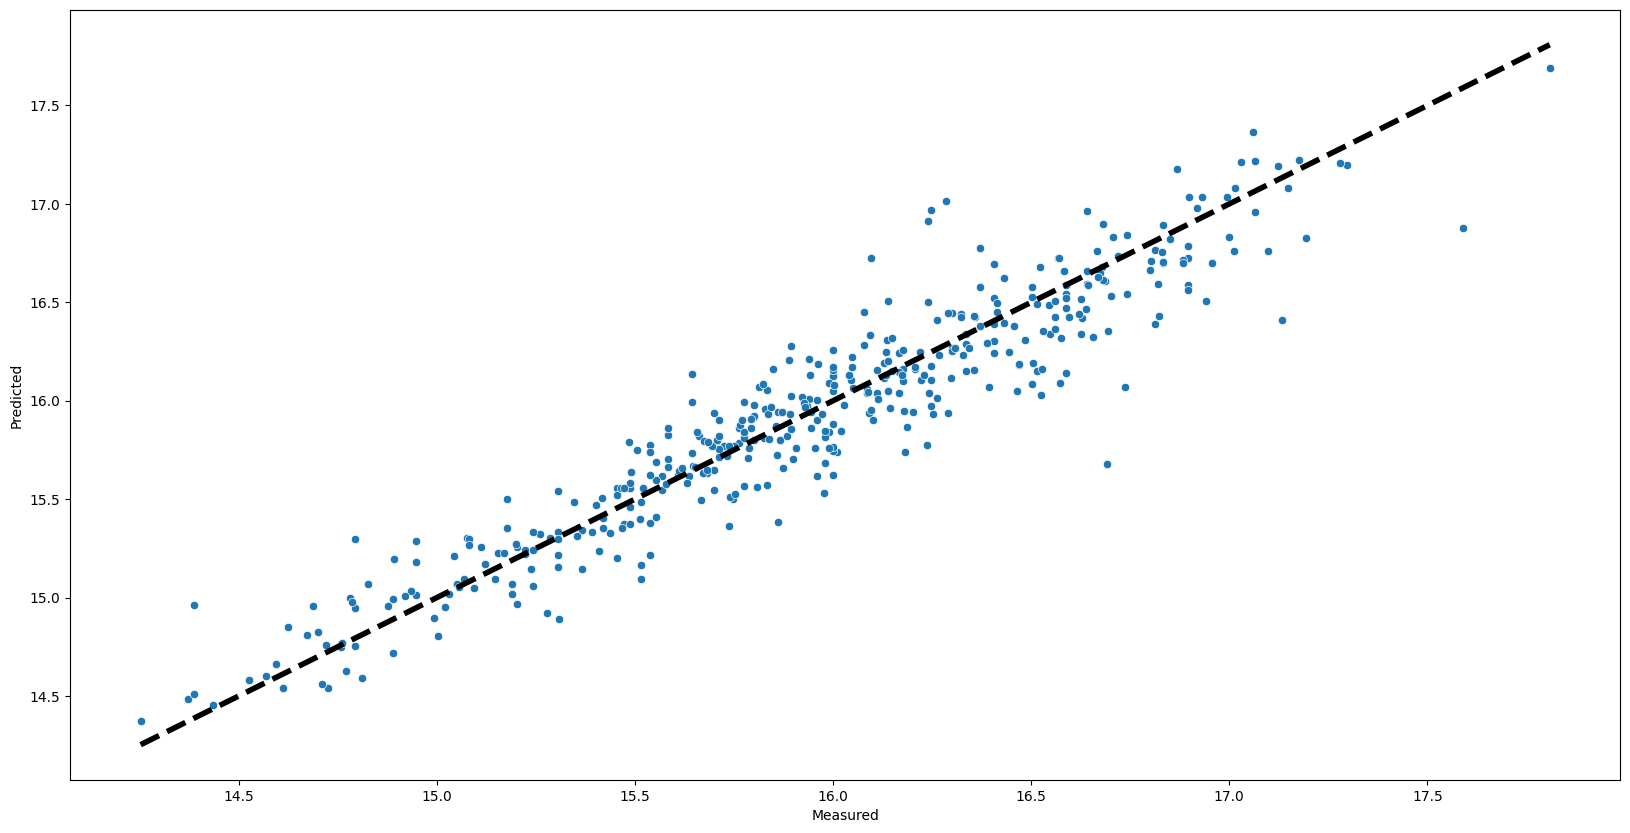

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


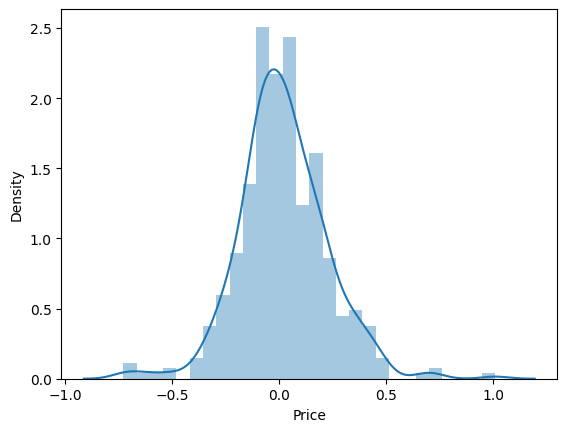

MSE : 0.04309901261342643
MAE : 0.1538881379462734
RMSE: 0.20760301686976138
r2_score : 0.8946036080150159
adjusted r2 : 0.8806990708138307


In [135]:
import xgboost

xg_boost  = xgboost.XGBRegressor()

parameters = {'max_depth': [2,4,5], 'eta': [.0001,.001,0.01,.1],'alpha' : np.arange(0.1,2,0.1),
              'n_estimators':[225,250,257,280], 'random_state':[30]}

score = GridSearchCV(xg_boost,param_grid=parameters, cv=5, refit=True)


## model fitting 

score.fit(X_train,y_train)

print(score.best_score_)
print(score.best_estimator_)
print(score.best_params_)

## prediction 

y_pred = score.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## calculating Residuals

Residuals = y_test-y_pred

## Dist plot 

sns.distplot(Residuals,kde=True)
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))

r2 = r2_score(y_test,y_pred)
print('r2_score :',r2)

adjr2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

### Predicting new values

In [278]:
inputt = [[8,1.41,0,512,1,157,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0]]

In [279]:
inputt = np.array(inputt)
inputt

array([[  8.  ,   1.41,   0.  , 512.  ,   1.  , 157.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ]])

In [280]:
output = score.predict(inputt)
np.expm1(output)

array([17990712.], dtype=float32)

In [274]:
y[1163]

15.260402801392086

In [176]:
backup.iloc[789:790,:]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
789,Dell,Inspiron 7567,Gaming,"15.6""",Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.62kg,8758620.0


In [188]:
y_pred[0]

100.09862219096549

In [654]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   RAM                       1302 non-null   float64
 4   Operating System          1302 non-null   object 
 5   Operating System Version  1302 non-null   object 
 6   Weight                    1302 non-null   float64
 7   Touchscreen               1302 non-null   int32  
 8   CPU Name                  1302 non-null   object 
 9   Storage GB                1302 non-null   int32  
 10  Storage Type              1302 non-null   object 
 11  GPU Brand                 1302 non-null   object 
 12  IPS                       1302 non-null   int64  
 13  PPI                       1302 non-null   float64
dtypes: float

## model training cum one hot coding 

In [645]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [646]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


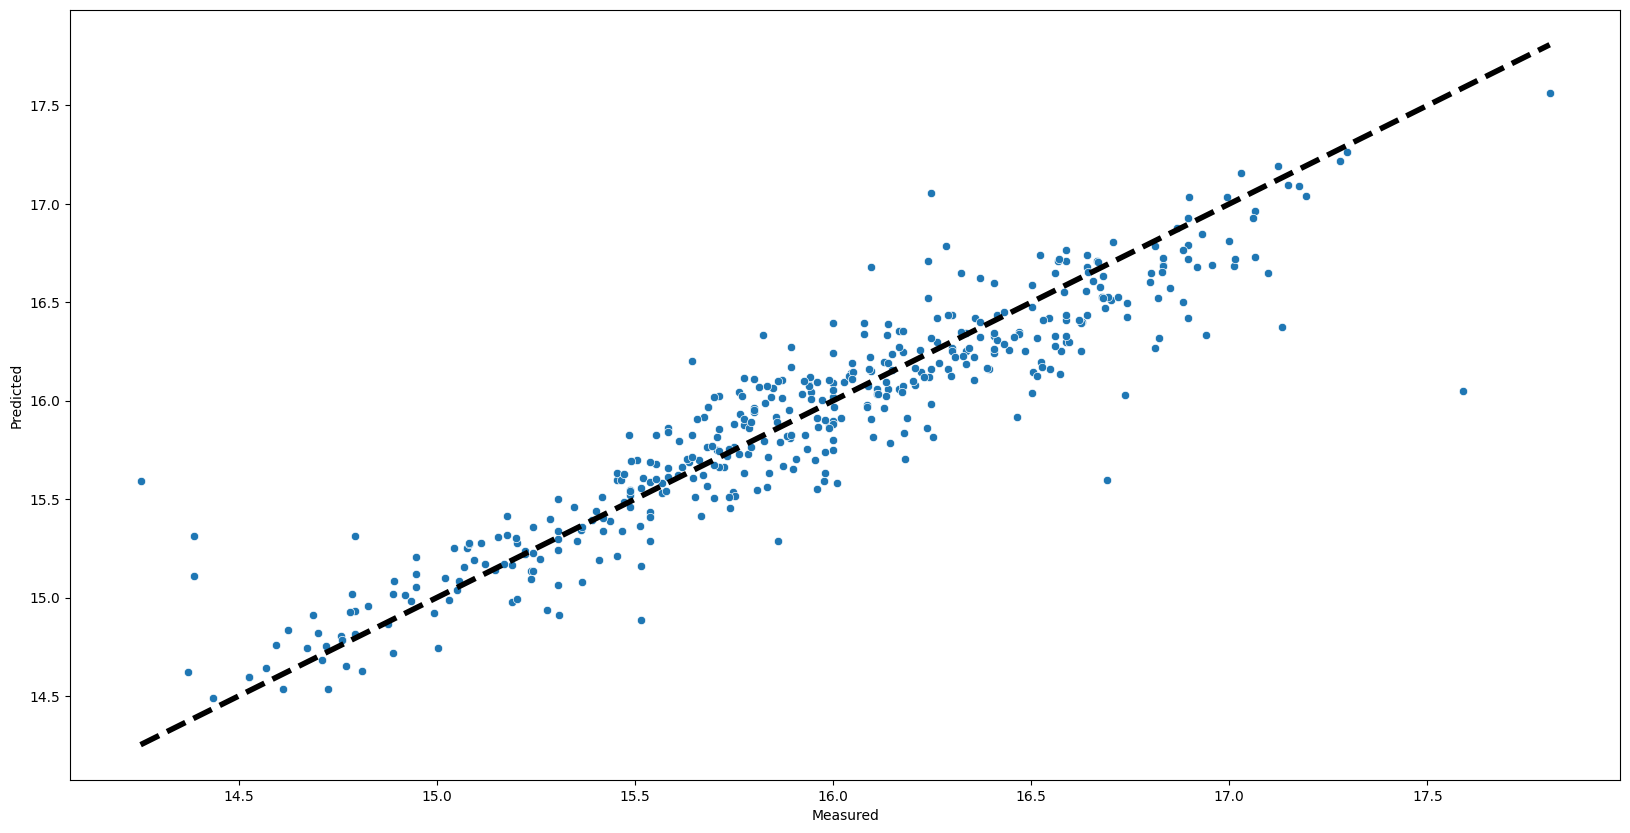

MSE : 0.058758793447309055
MAE : 0.17294087200929462
RMSE: 0.24240213168887162
r2_score : 0.8563084290982566
adjusted r2 : 0.8373517574753353


In [681]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,1,2,4,5,8,10,11])
],remainder='passthrough')


parameters = {'n_estimators':[57,75,100,112],
                'random_state':[3],'min_samples_split': range(2, 20)}

rf = GridSearchCV(rf_regressor,
              param_grid=parameters, cv=5, refit=True)

parameters = {'alpha': [0.3], 'learning_rate': [0.1], 'max_depth': [5], 'min_samples_leaf': [5], 
              'min_samples_split': [2], 'n_estimators': [224], 'random_state': [30]}

gbdt = GridSearchCV(gd_booster,param_grid=parameters, cv=5, refit=True)


parameters = {'alpha': [0.1], 'eta': [0.1], 'max_depth': [5], 'n_estimators': [250], 'random_state': [30]}

xgb = GridSearchCV(xg_boost,param_grid=parameters, cv=5, refit=True)


et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[1,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

## Scatter plot 

fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

## performance matrix 

print('MSE :', mean_squared_error(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test,y_pred)))

r2 = r2_score(y_test,y_pred)
print('r2_score :',r2)

adjr2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted r2 :',adjr2)

In [698]:
Output = pd.DataFrame({'pred_laptop_price': np.exp(y_pred), 'actual_laptop_price': np.exp(y_test)}, index = X_test.index )

In [699]:
Output

,pred_laptop_price,actual_laptop_price
478,6.106613e+06,6002100.00
724,1.160399e+07,11990684.16
312,1.460204e+07,18664308.00
851,1.371667e+07,16885908.00
1275,4.077589e+06,4081428.00
...,...,...
570,1.338841e+07,16547923.08
485,9.925534e+06,9327708.00
314,2.381571e+06,2445300.00
1054,5.454764e+06,6270193.80


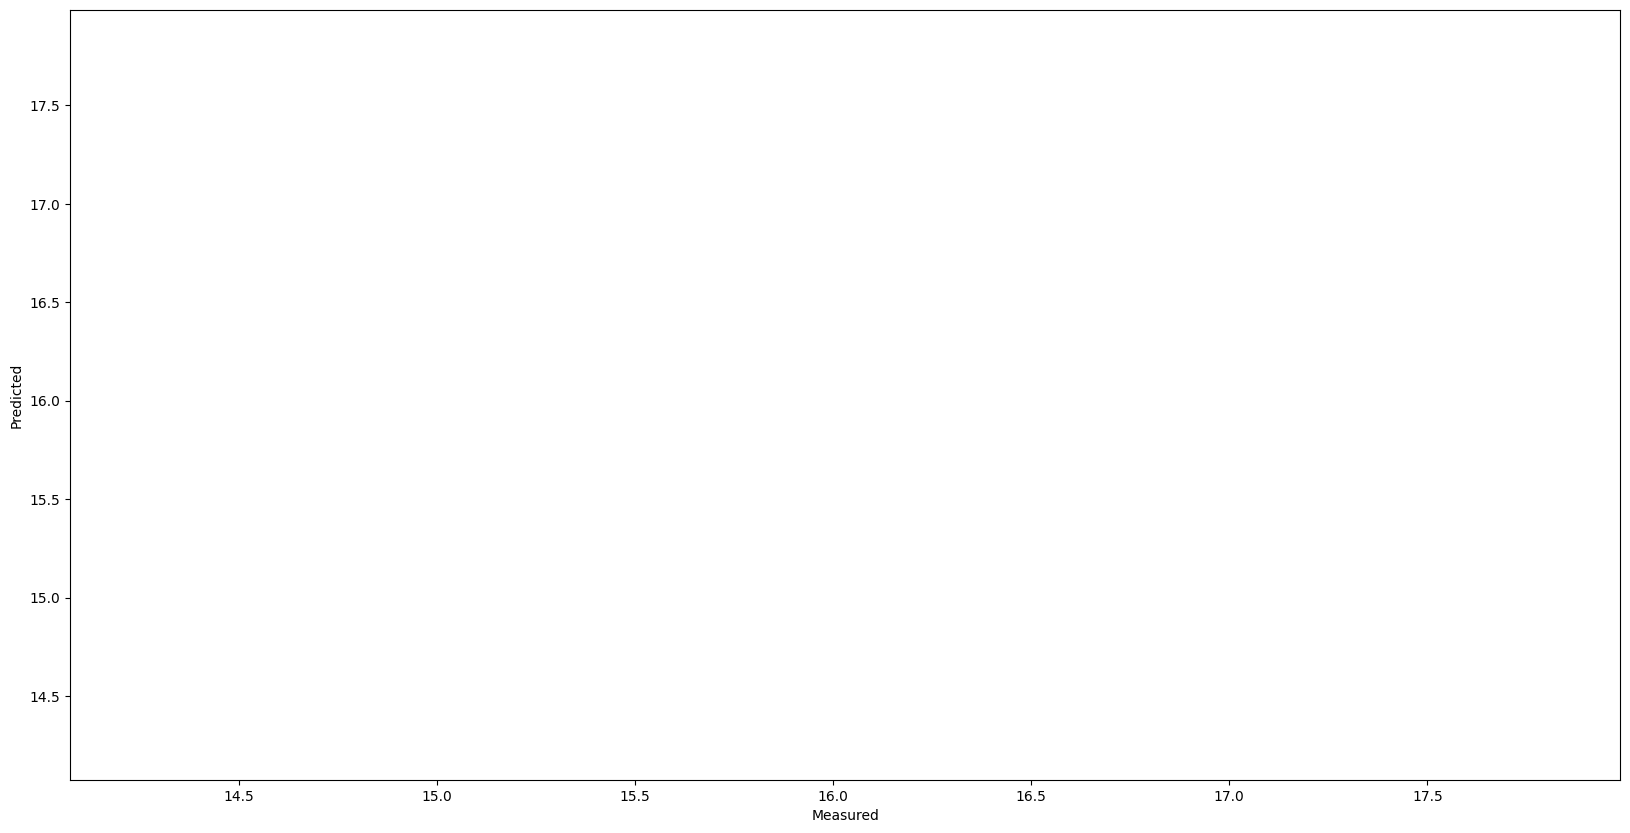

In [705]:
fig,ax = plt.subplots(figsize = (20,10))
# sns.scatterplot(y_test,y_pred)
ax.plot([(y_test), (y_test)], [(y_test), (y_test)],'k--',linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
plt.show()

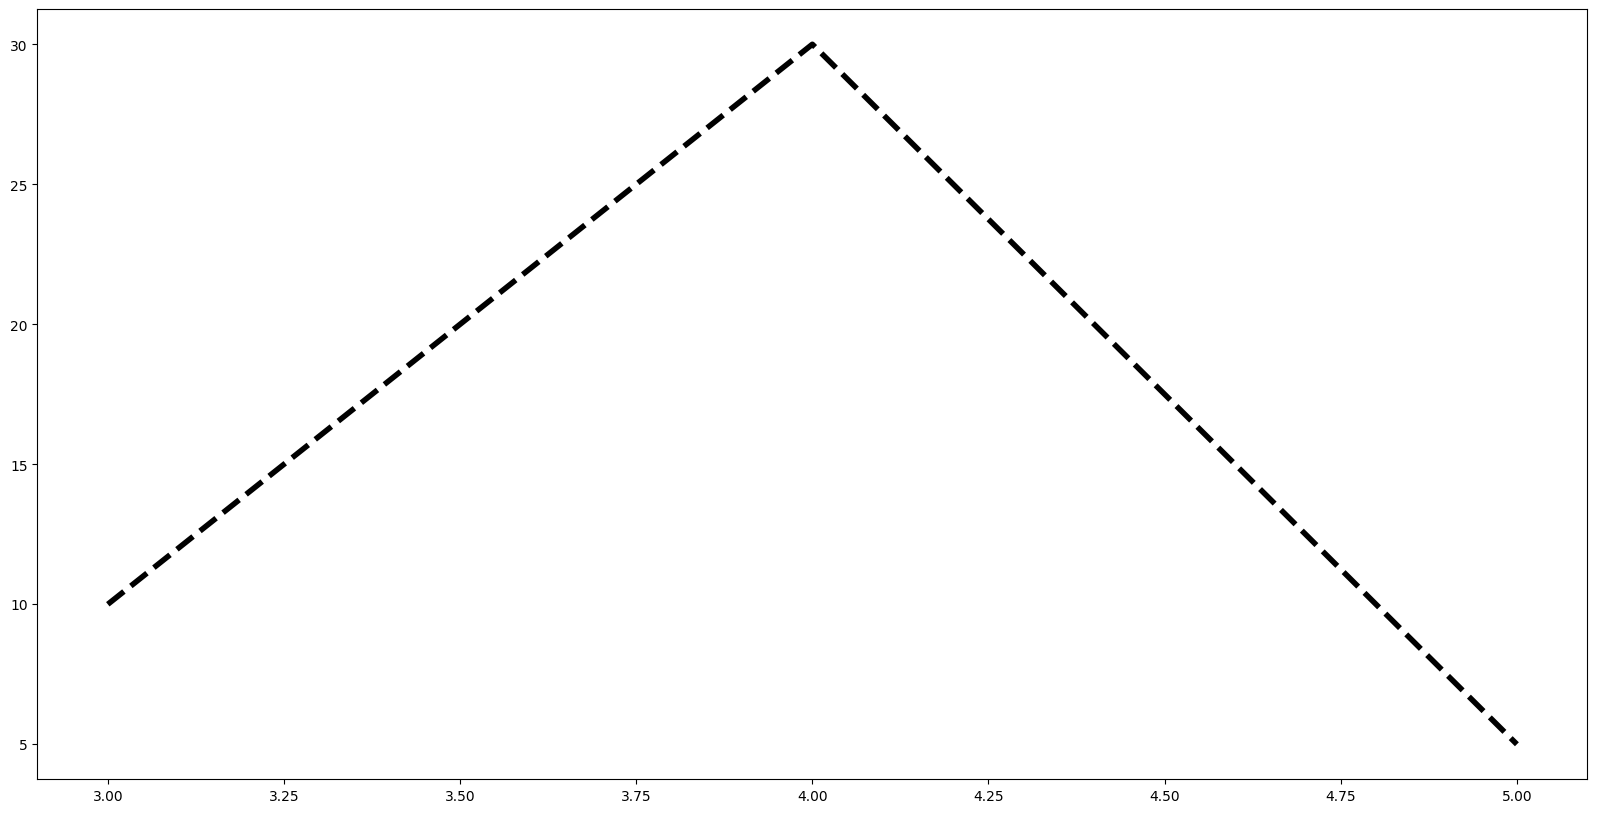

In [711]:
fig,ax = plt.subplots(figsize = (20,10))
ax.plot([3,4,5], [10,30,5],'k--',linewidth=4)
plt.show()

In [725]:
y_test = [15.60761997, 16.29964059, 16.74212359, 16.64198999, 15.22195749,
       16.3364131 , 16.58789351, 16.40546077, 16.80221561, 14.9479792 ,
       14.52662928, 16.70033838, 16.24125302, 16.22300579, 16.57615169,
       15.6110954 , 14.61036017, 15.5129022 , 16.58789351, 16.18215043,
       15.95879835, 16.00066255, 15.30551337, 15.97739393, 16.00914646,
       15.99966205, 16.56767946, 16.14389672, 15.51452954, 16.23889174,
       15.22195749, 17.80878738, 16.67818835, 16.54820576, 16.09506323,
       16.47004099, 15.51615424, 16.30002613, 16.40546077, 15.18870931,
       16.23018571, 15.34481116, 15.30551337, 15.8602504 , 17.0650284 ,
       15.89419031, 16.6852734 , 15.36578428, 15.7470598 , 16.58789351,
       16.81189495, 15.53703853, 17.12328104, 16.89634233, 14.75933396,
       16.88401679, 16.20686338, 15.80099136, 15.93985041, 15.89419031,
       14.9479792 , 15.82749894, 16.09050326, 15.61793693, 16.32202115,
       15.88974217, 15.68045729, 16.6903036 , 15.00370392, 15.36389571,
       15.48816887, 16.73782662, 15.36578428, 16.13955455, 16.26225729,
       17.0650284 , 15.64684068, 15.53862709, 16.47004099, 15.47133346,
       15.9440922 , 15.22195749, 15.43661195, 15.75091832, 15.77626822,
       14.56937083, 15.17740669, 15.9334538 , 15.58363081, 14.9479792 ,
       16.4127722 , 16.59564549, 16.40546077, 16.65558852, 15.99966205,
       15.99060212, 16.5716421 , 14.88896503, 15.85563678, 15.66248687,
       15.58364598, 16.0263303 , 15.11101375, 15.95879835, 15.72490905,
       16.35763745, 15.7392848 , 16.5458896 , 16.50446356, 15.87169217,
       15.8486762 , 16.81336897, 15.71164626, 14.72052839, 14.89199993,
       16.89634233, 17.19428195, 16.18714212, 15.83401748, 14.52662928,
       15.97943892, 16.81949921, 15.41613657, 15.63681912, 16.51468307,
       15.23709291, 16.82352134, 15.76368627, 17.06013893, 15.64255802,
       16.24046655, 15.45420975, 14.68761865, 15.40100572, 15.68458101,
       15.6982052 , 16.13606719, 15.78497861, 16.33427356, 16.26609902,
       14.79335085, 16.00056255, 15.75220119, 15.56833999, 16.34354279,
       15.48800191, 16.4855548 , 16.21899455, 17.13206467, 15.89084769,
       15.70629149, 15.56833999, 14.3862121 , 15.94197356, 15.83460797,
       16.50143784, 15.05133197, 16.0859224 , 16.20686338, 16.12742735,
       15.2604028 , 15.81312743, 14.88896503, 15.18873184, 14.37102193,
       15.45420975, 15.39213222, 15.55281173, 15.67493241, 15.52101255,
       15.55282738, 16.35623689, 16.26225729, 15.96088168, 15.6982052 ,
       15.03044348, 16.1272952 , 16.66489572, 16.1771337 , 15.83342663,
       16.16532918, 15.67260283, 16.91895927, 15.69549517, 15.53703853,
       15.07684356, 15.55281173, 15.99966205, 16.17545584, 15.30751537,
       16.55970675, 16.20278674, 15.84283847, 16.14822012, 16.25142127,
       16.37153622, 15.99966205, 16.69330961, 15.68458101, 15.92053651,
       16.99834892, 15.73147506, 15.05648662, 15.71298048, 15.04354983,
       16.37153622, 15.6567628 , 16.07669724, 15.17740669, 15.80099136,
       16.07669724, 16.39270464, 16.5307024 , 14.75898788, 16.7074266 ,
       16.0859224 , 14.79335085, 16.41475699, 16.67304565, 15.45420975,
       16.62606608, 16.46439657, 15.86713116, 16.13955455, 15.46451912,
       16.16532918, 15.6310471 , 16.62820398, 16.55970675, 16.24752263,
       16.3559986 , 14.77988263, 16.8331368 , 14.69870934, 17.01225983,
       16.68123095, 15.15436419, 16.52539108, 15.82511798, 16.30002613,
       14.87673246, 17.09894145, 15.99856035, 15.30551337, 16.02046518,
       15.48482439, 15.97943892, 16.8331368 , 15.57754251, 15.763027  ,
       15.86026191, 16.30667558, 14.25196257, 15.14734662, 15.41834093,
       16.68123095, 16.04467944, 15.97943892, 16.09324174, 16.58789351,
       15.06900435, 14.93354893, 15.66658744, 16.17880874, 15.76469969,
       16.45745429, 16.88236184, 16.84995842, 15.77427625, 15.0198333 ,
       16.5008316 , 15.98858997, 15.24351004, 15.78870619, 16.43074873,
       15.50472554, 15.08186869, 16.04849988, 15.09308376, 16.24752263,
       15.48816887, 16.44470714, 16.13955455, 16.40546077, 15.85794625,
       15.48967025, 14.72411906, 16.64198999, 17.58969366, 15.41905675,
       15.53703853, 16.94027911, 15.83802597, 16.17545584, 15.80099136,
       15.77501587, 15.75075143, 16.64198999, 16.80086881, 15.99966205,
       15.46725043, 14.82624855, 14.43524153, 15.93878715, 16.23573468,
       16.16617699, 16.74212359, 15.80829066, 15.79363838, 16.58789351,
       16.33642025, 16.43179541, 15.6982052 , 17.1477475 , 15.68045729,
       16.52834529, 16.71801442, 16.37153622, 15.77124939, 16.03892127,
       15.73819328, 15.77626822, 14.6726371 , 15.70629149, 14.3862121 ,
       15.58363081, 16.28508933, 15.95879835, 15.51452954, 16.40546077,
       16.04935748, 16.13410019, 15.1211858 , 17.01516833, 16.50143784,
       15.20215486, 15.58363081, 15.9440922 , 14.81141415, 15.19993016,
       16.24674108, 14.99253062, 16.64251644, 16.38932054, 15.53703853,
       16.89634233, 17.29796175, 16.09506323, 15.16825331, 16.28959385,
       16.89470768, 17.17623588, 15.71164626, 15.08186869, 15.92593901,
       15.80099136, 15.98960161, 15.64255802, 16.11130012, 16.13344367,
       15.93024009, 16.8331368 , 16.08684025, 17.02992476, 16.2888445 ,
       15.97113075, 15.30551337, 15.28526976, 15.24137557, 14.79335085,
       16.11043134, 15.8739649 , 16.24674108, 16.52340094, 15.64255802,
       16.10050789, 16.11309798, 16.89933499, 16.29705657, 15.79240762,
       15.8975218 , 16.63776834, 14.76966108, 16.99354389, 16.51348618,
       16.62545059, 15.24351004, 15.95461862, 16.09506323, 15.82225333,
       17.27848044, 15.3536926 , 16.86860302, 15.71165961, 15.90635187,
       15.89419031, 16.82921   , 16.58287817, 16.95578931, 15.47133346,
       15.48816887, 15.73799824, 15.30551337, 16.14822012, 15.87169217,
       14.59412467, 15.88300451, 14.91890738, 16.58789351, 14.62376391,
       15.99966205, 16.66797384, 16.17377517, 16.00266056, 14.78663941,
       15.89419031, 16.57107697, 16.93182219, 16.32202115, 15.20215486,
       14.75933396, 16.55970675, 15.23627713, 16.32852642, 15.40826528,
       16.62177116, 16.04849988, 14.70967837, 15.65131782, 15.27705617]

In [726]:
y_test

[15.60761997,
 16.29964059,
 16.74212359,
 16.64198999,
 15.22195749,
 16.3364131,
 16.58789351,
 16.40546077,
 16.80221561,
 14.9479792,
 14.52662928,
 16.70033838,
 16.24125302,
 16.22300579,
 16.57615169,
 15.6110954,
 14.61036017,
 15.5129022,
 16.58789351,
 16.18215043,
 15.95879835,
 16.00066255,
 15.30551337,
 15.97739393,
 16.00914646,
 15.99966205,
 16.56767946,
 16.14389672,
 15.51452954,
 16.23889174,
 15.22195749,
 17.80878738,
 16.67818835,
 16.54820576,
 16.09506323,
 16.47004099,
 15.51615424,
 16.30002613,
 16.40546077,
 15.18870931,
 16.23018571,
 15.34481116,
 15.30551337,
 15.8602504,
 17.0650284,
 15.89419031,
 16.6852734,
 15.36578428,
 15.7470598,
 16.58789351,
 16.81189495,
 15.53703853,
 17.12328104,
 16.89634233,
 14.75933396,
 16.88401679,
 16.20686338,
 15.80099136,
 15.93985041,
 15.89419031,
 14.9479792,
 15.82749894,
 16.09050326,
 15.61793693,
 16.32202115,
 15.88974217,
 15.68045729,
 16.6903036,
 15.00370392,
 15.36389571,
 15.48816887,
 16.73782662,
 1

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


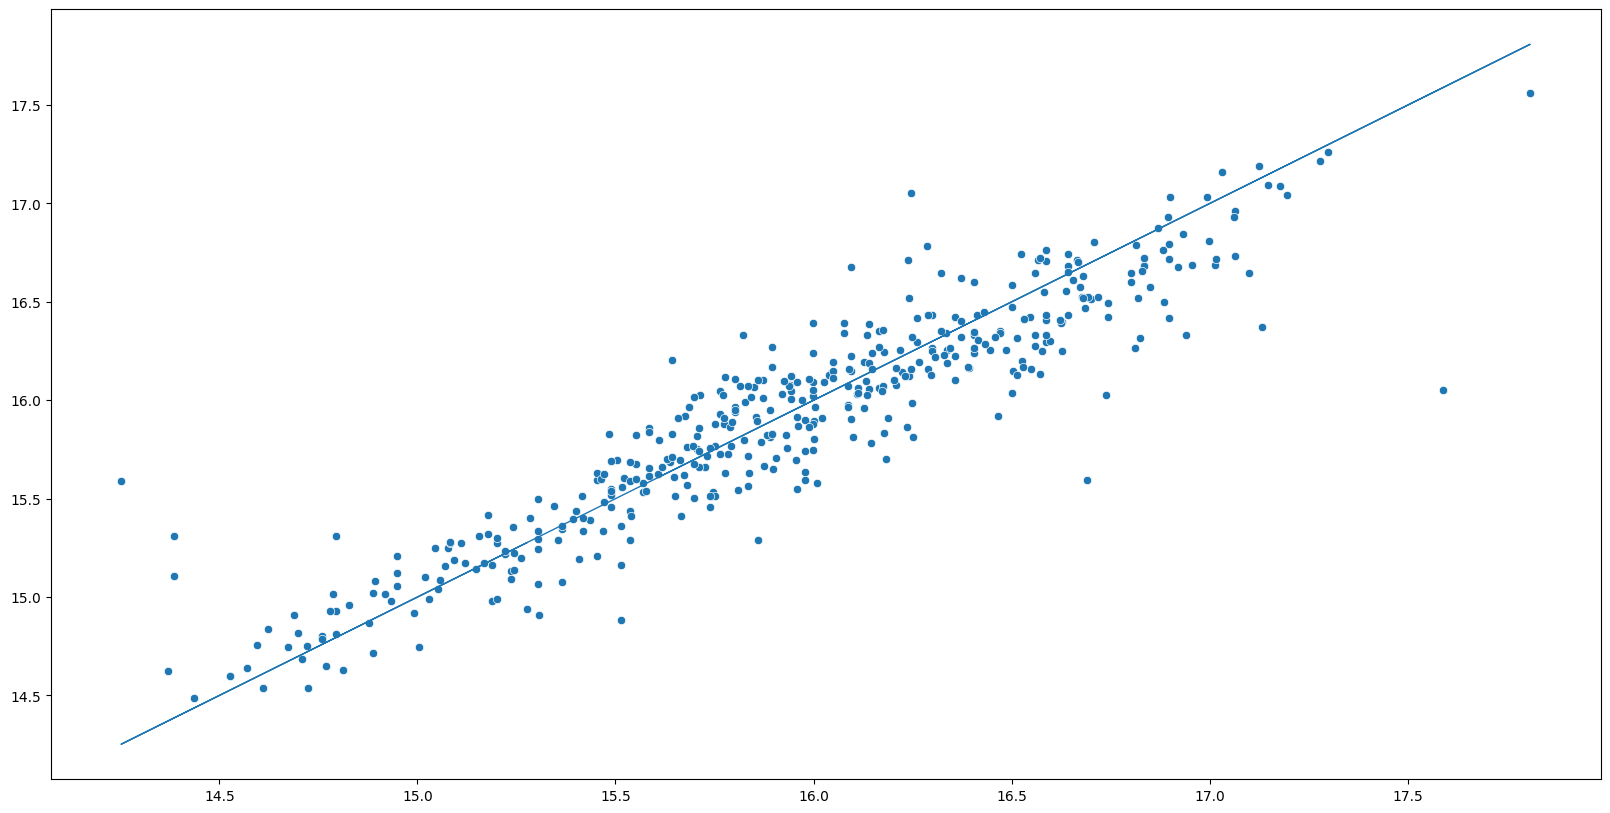

In [738]:
fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y_test,y_pred,)
ax.plot(y_test,y_test,linewidth=1,)
plt.show()